<h1>1 Exploratory Data Analysis (EDA)</h1>

<h2>1.1 Dataset overview</h2>

<p>This dataset contains shipment and customer records from an international e-commerce company that sells electronic products</p>

<p>
ID – Unique identifier of the order

Warehouse_block – Warehouse from which the product was shipped

Mode_of_Shipment – Shipment method (Ship, Flight, Road)

Customer_care_calls – Number of customer service calls made for the order

Customer_rating – Customer rating of the service (1–5)

Cost_of_the_Product – Price of the product

Prior_purchases – Number of previous purchases by the customer

Product_importance – Importance level of the product (Low, Medium, High)

Gender – Gender of the customer

Discount_offered – Discount applied to the product

Weight_in_gms – Weight of the product in grams

Reached.on.Time_Y.N – Indicates whether the order was delivered on time (0 = Yes, 1 = No)
</p>

<p>The goal of this project is to apply unsupervised learning techniques to identify meaningful clusters of customers and shipment profiles based on their shared characteristics.</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv("../data/Train.csv")

df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [3]:
df.shape

(10999, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.describe()

ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

<h2>1.2 Data types & missing values</h2>

In [6]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

<p>Some of the features are numerical. Those features are: ID, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Discount_offered, Weight_in_gms.</p>
<p>While other features, such as: Warehouse_block, Mode_of_Shipment, Product_importance and Gender are Categorical</p>
<p>Reached.on.Time_Y.N (0 or 1) is int64 but it is actually a binary Categorical feature</p>


In [7]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

<p>The dataset does not contain missing values, which simplifies preprocessing.</P>

In [8]:
duplicates = df.duplicated().sum()


<p>The dataset does not contain duplicate rows.</P>

<h2>1.3 Numerical Features Distribution Analysis</h2>

In [9]:
clustering_features = df.drop(['ID', 'Reached.on.Time_Y.N'], axis=1)
numerical_features = clustering_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = clustering_features.select_dtypes(include=['object']).columns.tolist()

numerical_features

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms']

In [10]:
summary = []

for col in numerical_features:
    summary.append({
        "Feature": col,
        "Mean": clustering_features[col].mean(),
        "Median": clustering_features[col].median(),
        "Mode": clustering_features[col].mode().iloc[0],
        'Skewness': clustering_features[col].skew(),
        'Range': clustering_features[col].max() - clustering_features[col].min()
    })

summary_df = pd.DataFrame(summary)
summary_df

Feature         Mean  Median  Mode  Skewness  Range
0  Customer_care_calls     4.054459     4.0     4  0.391926      5
1      Customer_rating     2.990545     3.0     3  0.004360      4
2  Cost_of_the_Product   210.196836   214.0   245 -0.157117    214
3      Prior_purchases     3.567597     3.0     3  1.681897      8
4     Discount_offered    13.373216     7.0    10  1.798929     64
5        Weight_in_gms  3634.016729  4149.0  4883 -0.249747   6845

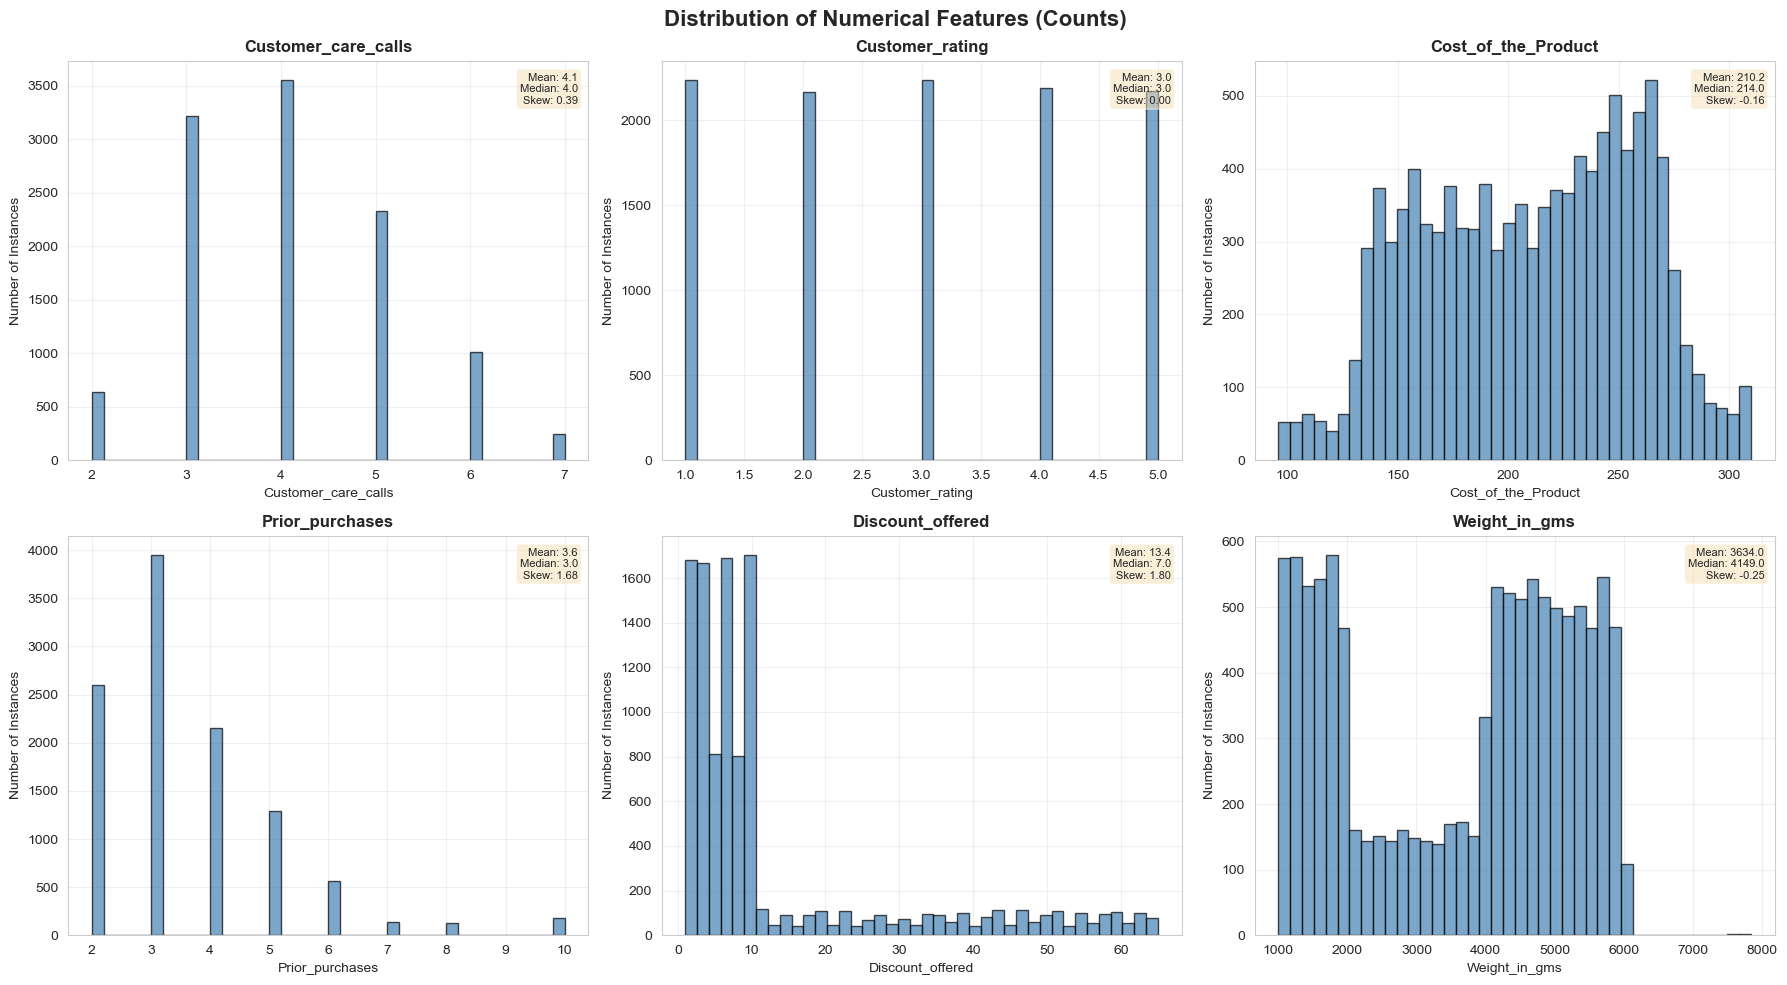

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Numerical Features (Counts)', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_features):
    row = idx // 3
    col_idx = idx % 3

    axes[row, col_idx].hist(
        clustering_features[col],
        bins=40,
        alpha=0.7,
        color='steelblue',
        edgecolor='black'
    )

    axes[row, col_idx].set_title(col, fontsize=12, fontweight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Number of Instances')
    axes[row, col_idx].grid(alpha=0.3)

    stats_text = (
        f"Mean: {clustering_features[col].mean():.1f}\n"
        f"Median: {clustering_features[col].median():.1f}\n"
        f"Skew: {clustering_features[col].skew():.2f}"
    )

    axes[row, col_idx].text(
        0.98, 0.97, stats_text,
        transform=axes[row, col_idx].transAxes,
        fontsize=8,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    )

plt.tight_layout()
plt.show()

In [12]:
clustering_features[numerical_features].skew()

Customer_care_calls    0.391926
Customer_rating        0.004360
Cost_of_the_Product   -0.157117
Prior_purchases        1.681897
Discount_offered       1.798929
Weight_in_gms         -0.249747
dtype: float64

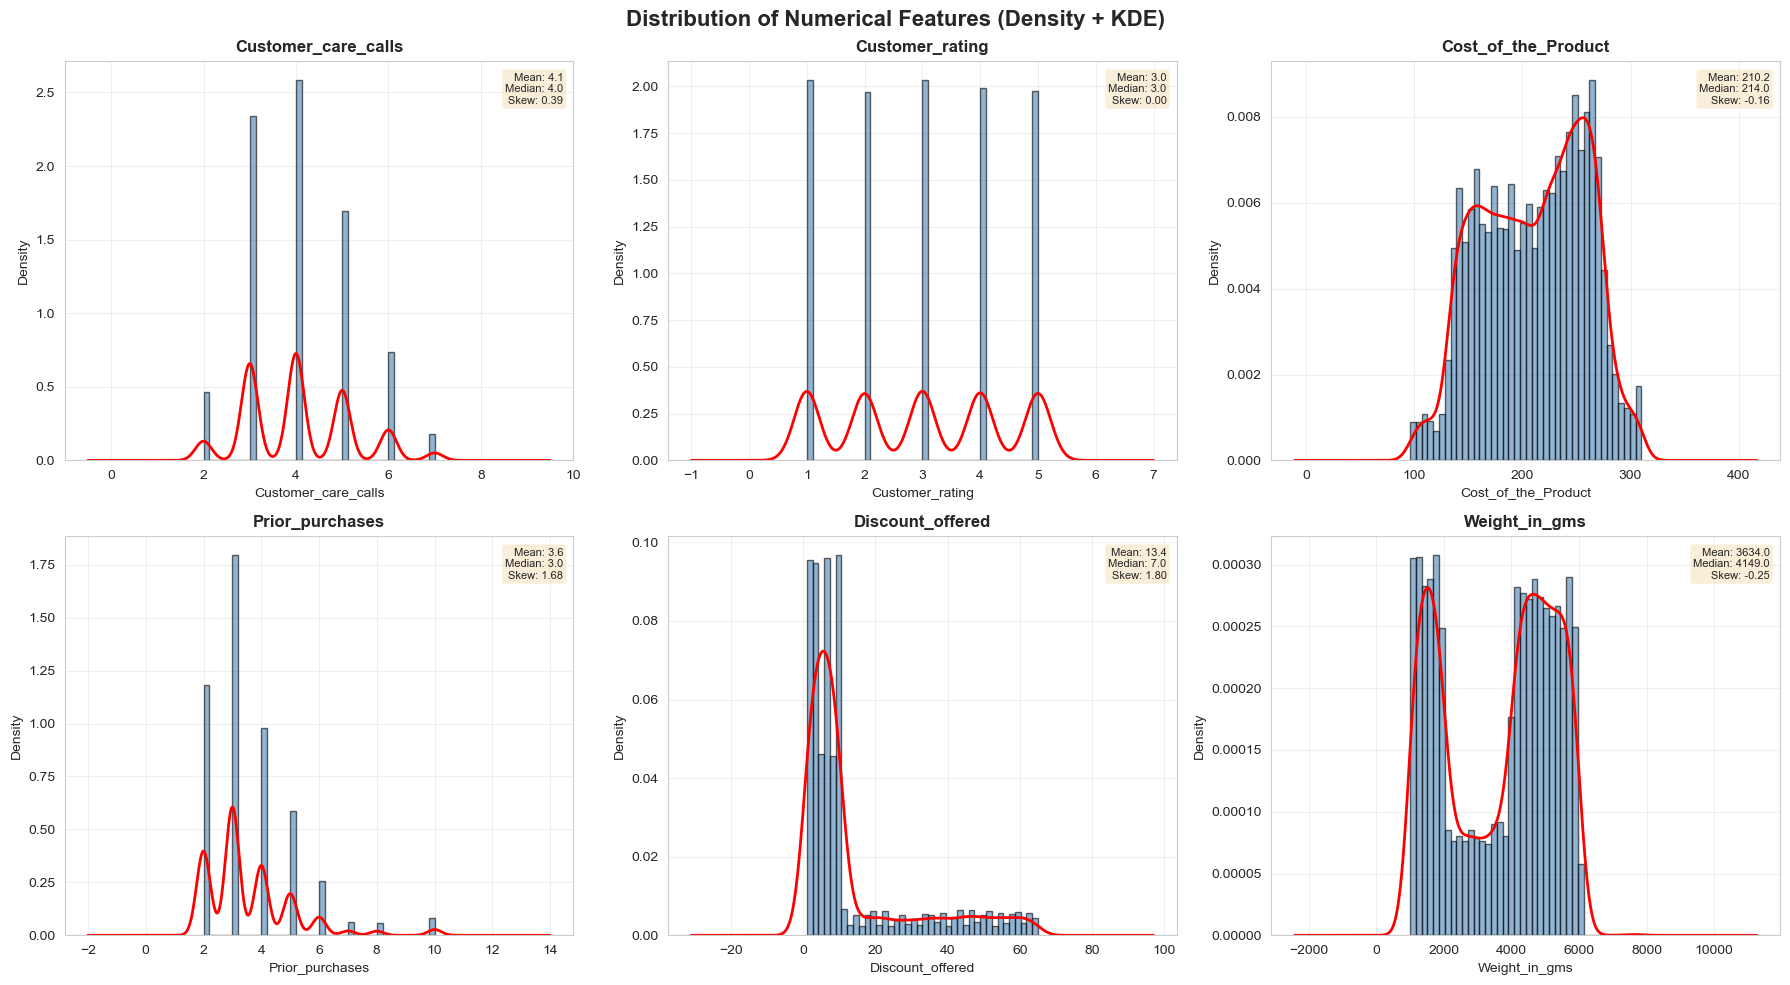

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Numerical Features (Density + KDE)', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_features):
    row = idx // 3
    col_idx = idx % 3

    axes[row, col_idx].hist(
        clustering_features[col],
        bins=40,
        alpha=0.6,
        color='steelblue',
        edgecolor='black',
        density=True
    )

    clustering_features[col].plot(
        kind='kde',
        ax=axes[row, col_idx],
        color='red',
        linewidth=2
    )

    axes[row, col_idx].set_title(col, fontsize=12, fontweight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Density')
    axes[row, col_idx].grid(alpha=0.3)

    stats_text = (
        f"Mean: {clustering_features[col].mean():.1f}\n"
        f"Median: {clustering_features[col].median():.1f}\n"
        f"Skew: {clustering_features[col].skew():.2f}"
    )

    axes[row, col_idx].text(
        0.98, 0.97, stats_text,
        transform=axes[row, col_idx].transAxes,
        fontsize=8,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    )

plt.tight_layout()
plt.show()

In [14]:
outlier_summary = []

for col in numerical_features:
    Q1 = clustering_features[col].quantile(0.25)
    Q3 = clustering_features[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = clustering_features[(clustering_features[col] < lower_bound) | 
                                   (clustering_features[col] > upper_bound)]
    outlier_pct = (len(outliers) / len(clustering_features)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': round(lower_bound, 2),
        'Upper_Bound': round(upper_bound, 2),
        'Outliers_Count': len(outliers),
        'Outliers_Percentage': round(outlier_pct, 2)
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

            Feature     Q1     Q3    IQR  Lower_Bound  Upper_Bound  Outliers_Count  Outliers_Percentage
Customer_care_calls    3.0    5.0    2.0         0.00         8.00               0                 0.00
    Customer_rating    2.0    4.0    2.0        -1.00         7.00               0                 0.00
Cost_of_the_Product  169.0  251.0   82.0        46.00       374.00               0                 0.00
    Prior_purchases    3.0    4.0    1.0         1.50         5.50            1003                 9.12
   Discount_offered    4.0   10.0    6.0        -5.00        19.00            2209                20.08
      Weight_in_gms 1839.5 5050.0 3210.5     -2976.25      9865.75               0                 0.00


In [15]:
significant_outliers = outlier_df[outlier_df['Outliers_Percentage'] > 5]

print(significant_outliers)

            Feature   Q1    Q3  IQR  Lower_Bound  Upper_Bound  Outliers_Count  \
3   Prior_purchases  3.0   4.0  1.0          1.5          5.5            1003   
4  Discount_offered  4.0  10.0  6.0         -5.0         19.0            2209   

   Outliers_Percentage  
3                 9.12  
4                20.08  


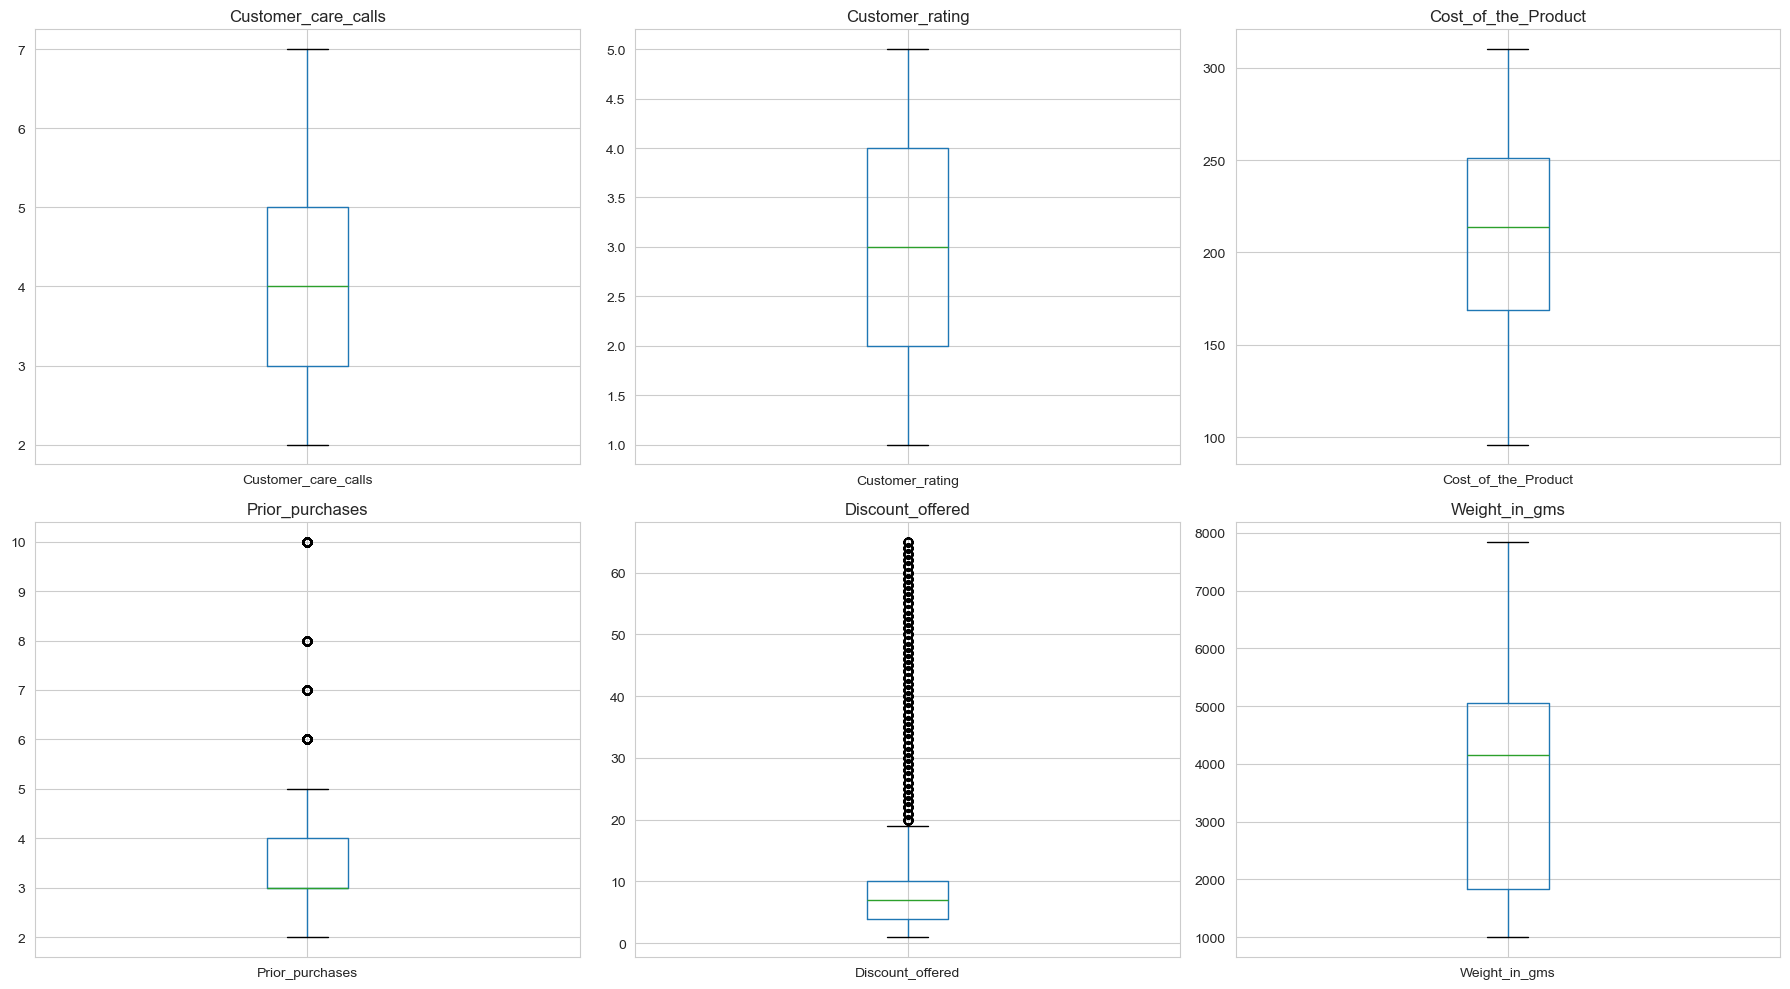

In [16]:
fig, axes = plt.subplots(2, 3,  figsize=(18, 10))
axes = axes.flatten()

for ax, col in zip(axes, numerical_features):
    df.boxplot(column=col, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

<p>Prior purchases exhibits slight right-skewness, with a small number of customers showing higher repeat purchase behavior. These values appear to represent genuine loyal customers rather than noise.
Discount offered exhibits noticeable right-skewness with several high-value observations. These values likely reflect promotional strategies rather than data errors.</p>

<p>Overall, the boxplot analysis indicates that the dataset contains some outliers. Therefore, clustering will be tested with and without outlier handling.</p>

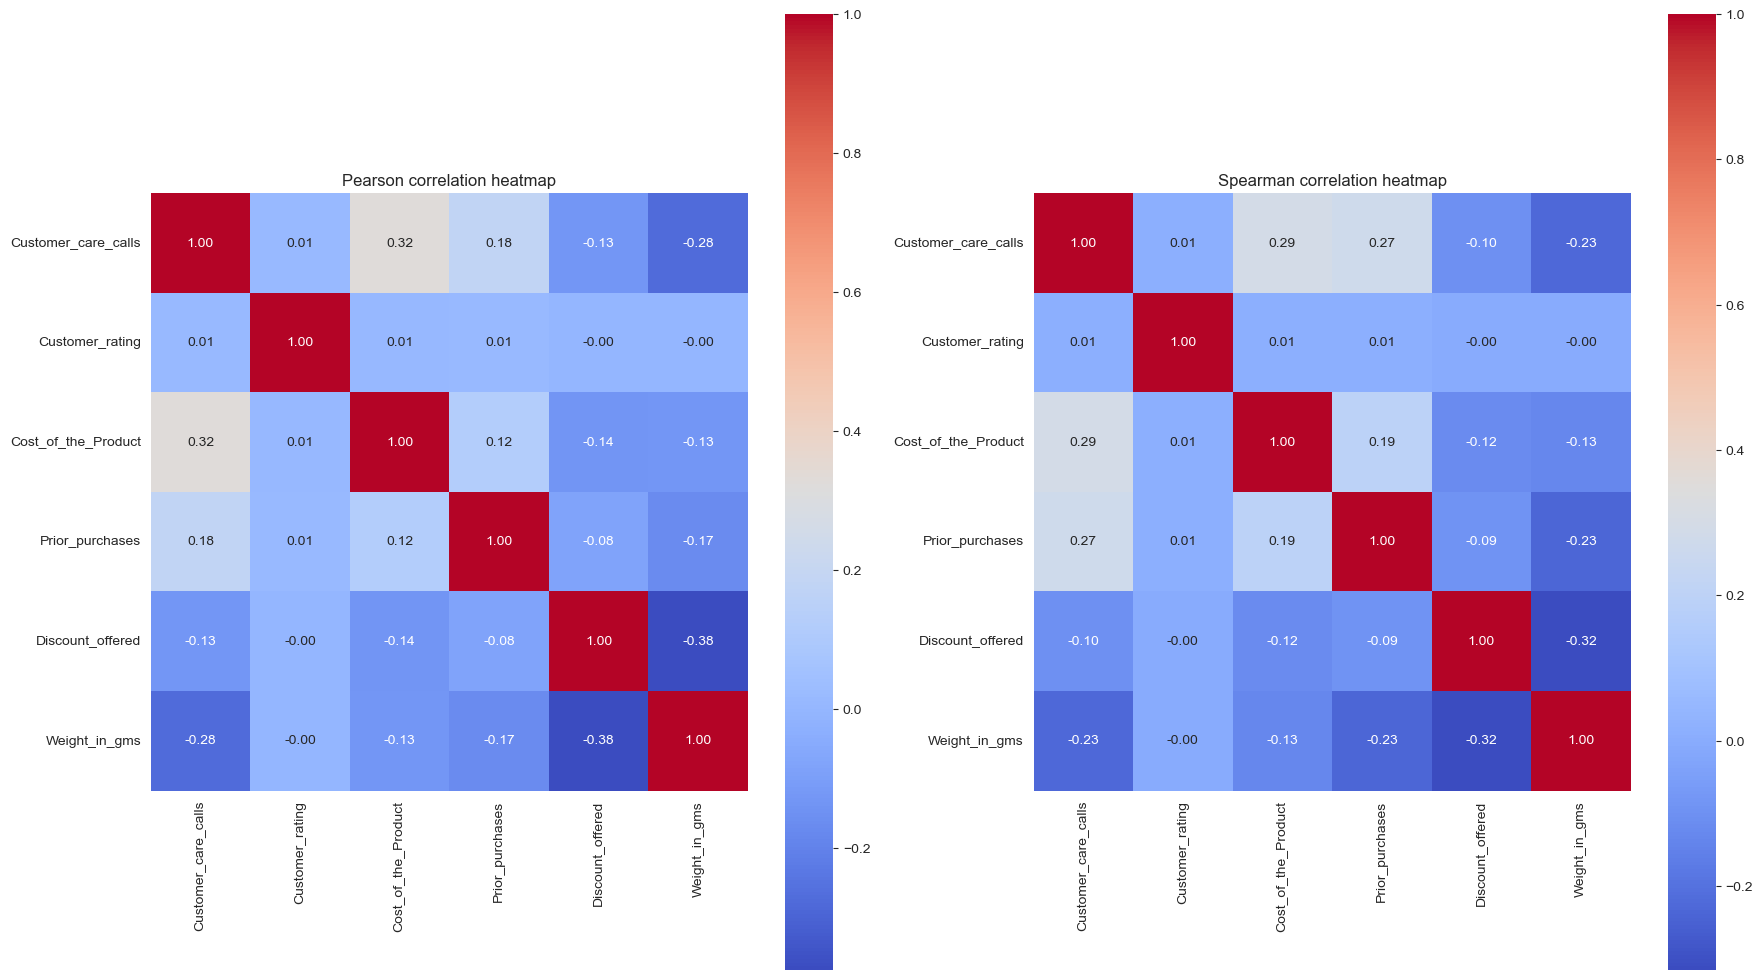

In [17]:
pearson = df[numerical_features].corr(method='pearson')
spearman = df[numerical_features].corr(method='spearman')


fig, axes = plt.subplots(1, 2,  figsize=(18, 10))


sns.heatmap(pearson, annot=True, fmt='.2f', cmap='coolwarm', square=True,ax=axes[0])
axes[0].set_title('Pearson correlation heatmap')

sns.heatmap(spearman, annot=True, fmt='.2f', cmap='coolwarm', square=True,ax=axes[1])
axes[1].set_title('Spearman correlation heatmap')

plt.tight_layout()
plt.show()

<p>Both correlation heatmaps display low levels of correlations between the numerical features</p>

<p>Possible correlations:</p>

<p>Heavier packages tend to receive slightly lower discounts or high discounts are more common in lighter shipments</p>
More expensive products may trigger more customer service calls</p>


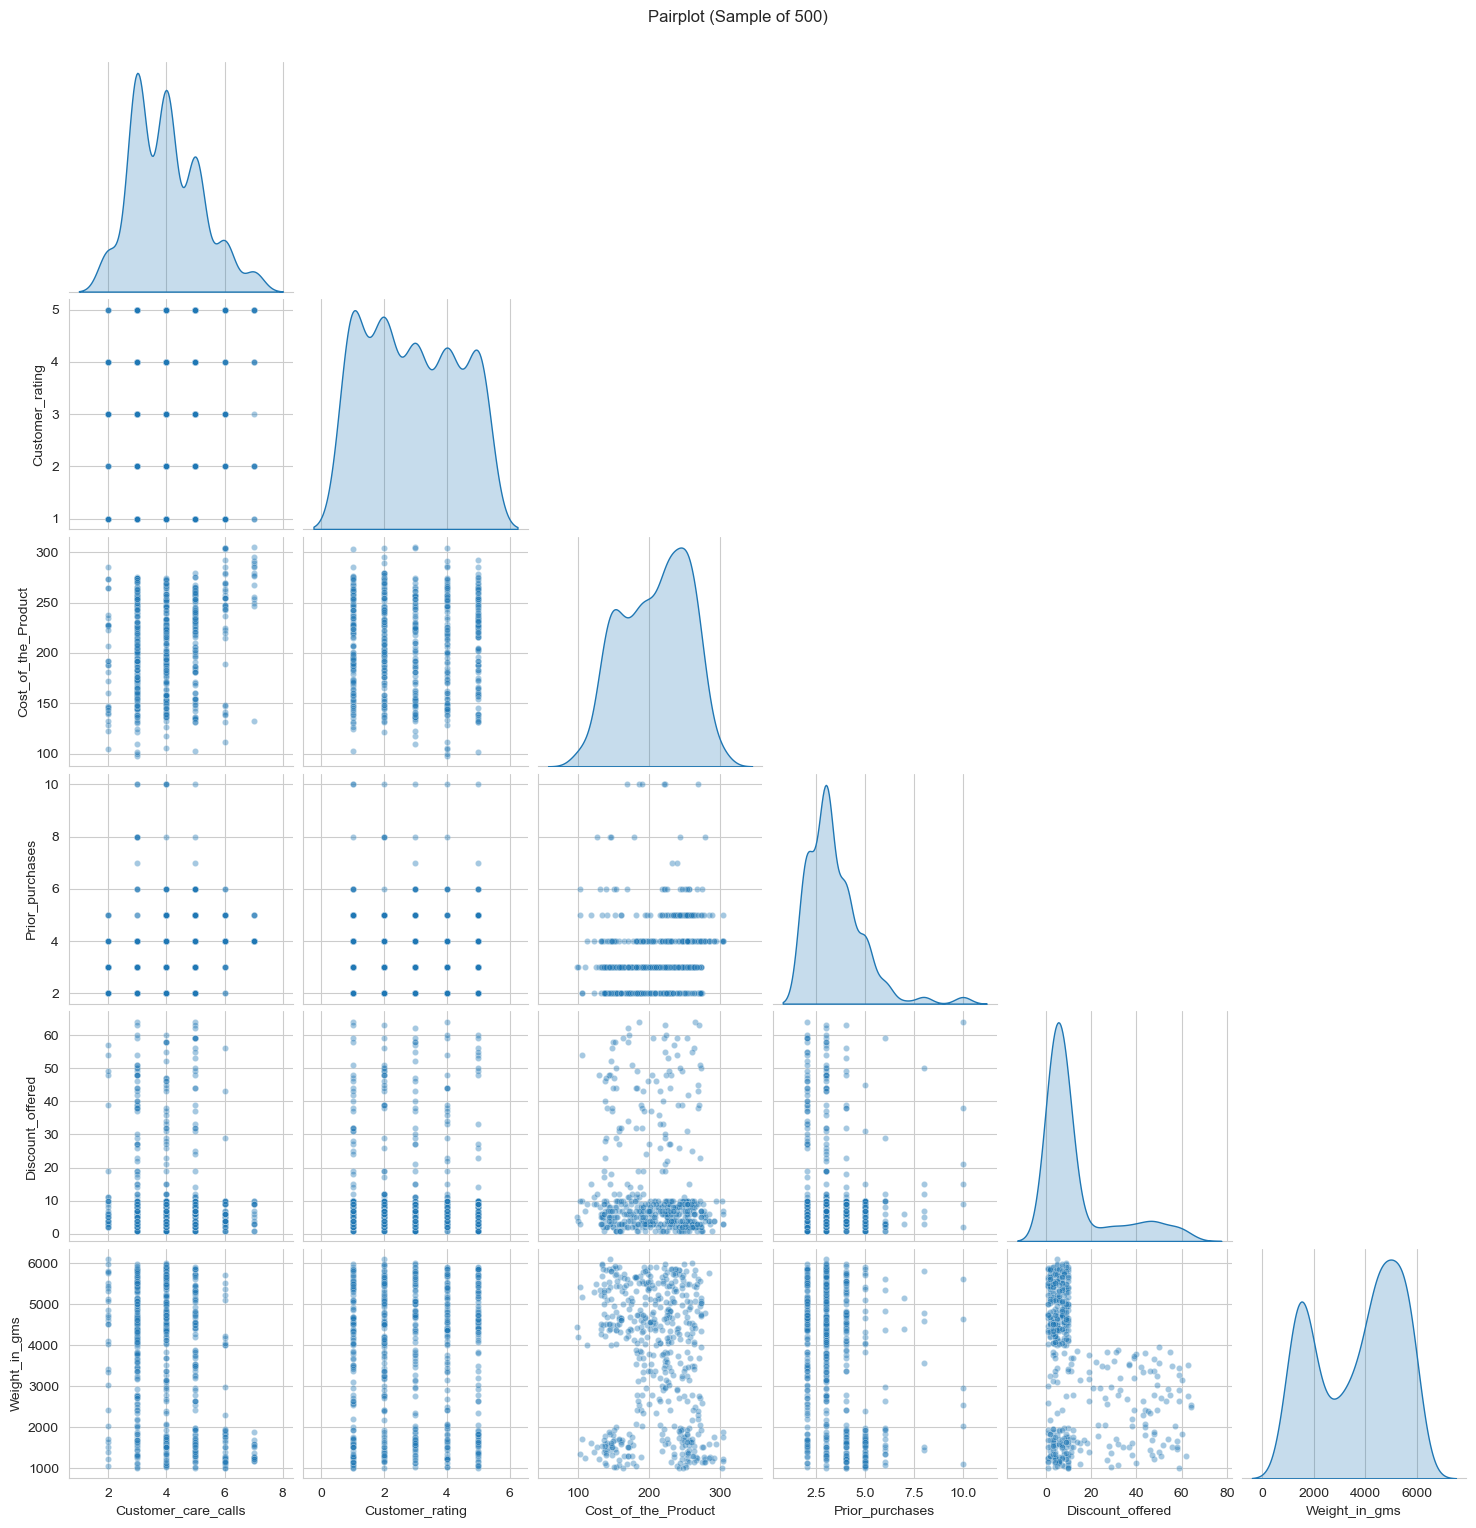

In [18]:
sampled = clustering_features.sample(500, random_state=42)

sns.pairplot(
    sampled[numerical_features],
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha': 0.4, 's': 20}
)

plt.suptitle('Pairplot (Sample of 500)', y=1.02)
plt.show()

<p>Pairplot was used to visually inspect potential relationships between numerical features and to detect possible natural separations or strong correlations before applying clustering.</p>

<p>The pairplot reveals a bimodal distribution in package weight and a highly skewed distribution in discount offered, suggesting natural groupings within the dataset. This supports the decision to discretize weight and binarize discount prior to clustering.</p>

<p>The numerical feature analysis revealed significant skewness in discount and prior purchases, as well as a clear bimodal distribution in shipment weight. These observations suggest the presence of inherent structural groupings within the dataset, supporting the applicability of clustering techniques.</p>

<h2>1.4 Categorical Features Distribution Analysis</h2>

In [19]:
cat_summary = []

for col in categorical_features:
    value_counts = clustering_features[col].value_counts()
    print(value_counts)
    print(f"\nUnique values: {clustering_features[col].nunique()}")
    print(f"Most common: {clustering_features[col].mode()[0]} ({value_counts.iloc[0]} occurrences)")
    
    max_pct = (value_counts.iloc[0] / len(clustering_features)) * 100
    min_pct = (value_counts.iloc[-1] / len(clustering_features)) * 100
    imbalance_ratio = value_counts.iloc[0] / value_counts.iloc[-1]
    
    cat_summary.append({
        'Feature': col,
        'Unique_Values': clustering_features[col].nunique(),
        'Most_Common': clustering_features[col].mode()[0],
        'Imbalance_Ratio': round(imbalance_ratio, 2)
    })

cat_df = pd.DataFrame(cat_summary)
print(cat_df.to_string(index=False))

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

Unique values: 5
Most common: F (3666 occurrences)
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

Unique values: 3
Most common: Ship (7462 occurrences)
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

Unique values: 3
Most common: low (5297 occurrences)
Gender
F    5545
M    5454
Name: count, dtype: int64

Unique values: 2
Most common: F (5545 occurrences)
           Feature  Unique_Values Most_Common  Imbalance_Ratio
   Warehouse_block              5           F             2.00
  Mode_of_Shipment              3        Ship             4.24
Product_importance              3         low             5.59
            Gender              2           F             1.02


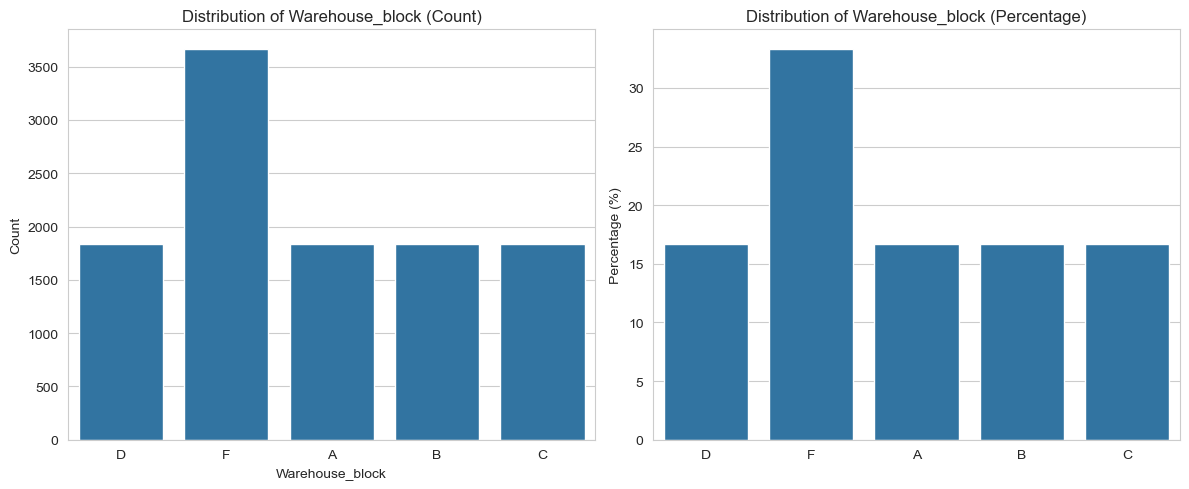

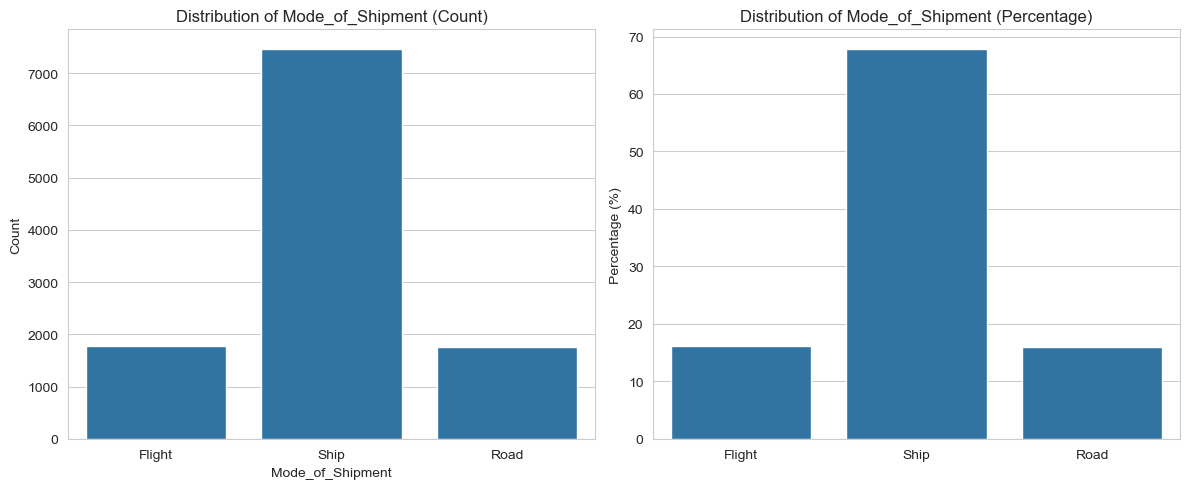

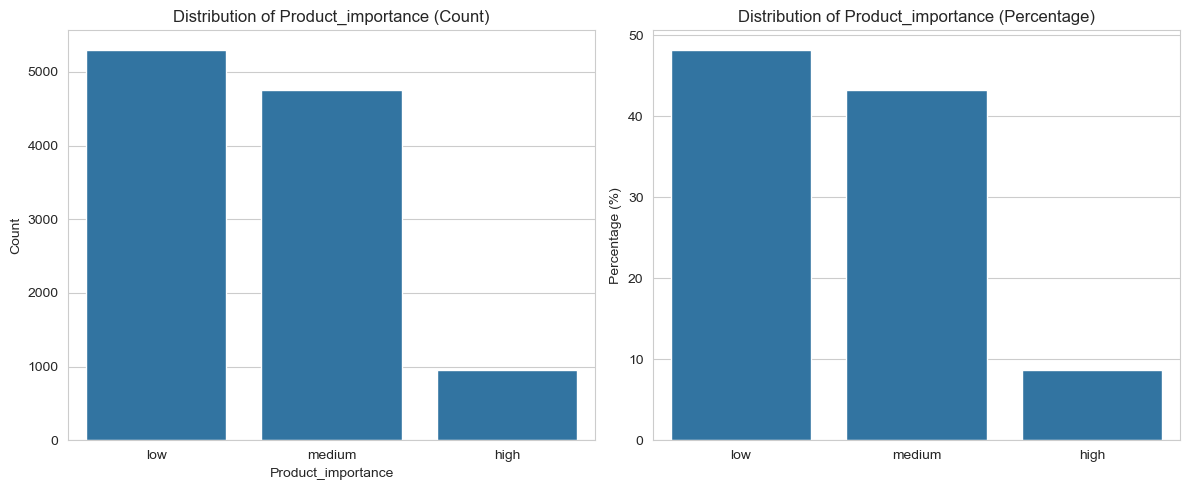

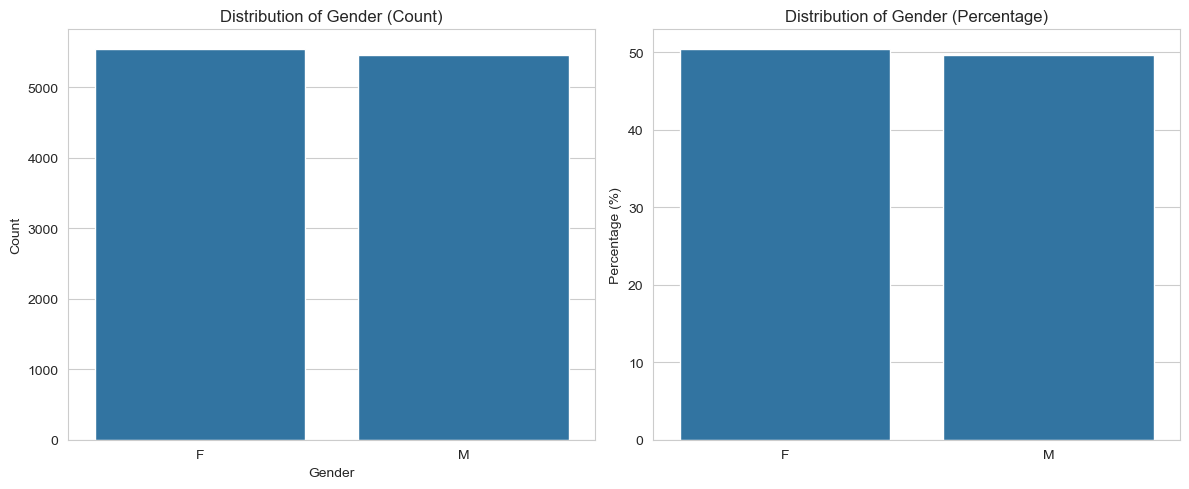

In [20]:
for col in categorical_features:
    
    category_order = df[col].unique()
    
    percentages = (
        df[col]
        .value_counts(normalize=True)
        .reindex(category_order) * 100
    )
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.countplot(
        x=col,
        data=df,
        order=category_order,
        ax=axes[0]
    )
    
    axes[0].set_title(f"Distribution of {col} (Count)")
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x')
    

    sns.barplot(
        x=category_order,
        y=percentages.values,
        ax=axes[1]
    )
    
    axes[1].set_title(f"Distribution of {col} (Percentage)")
    axes[1].set_ylabel("Percentage (%)")
    axes[1].tick_params(axis='x')
    
    plt.tight_layout()
    plt.show()

<p>
1. Warehouse_block (5 categories):
    Block F is dominant (~33%)
    Moderate imbalance
</p>
<p>
2. Mode_of_Shipment (3 categories):
   Ship dominates (~68%)
   Highly imbalanced
</p>
<p> 
3. Product_importance (3 categories):
   Low and Medium are common (~48% and ~43%)
   High importance is rare (~9%)
</p> 
<p>
4. Gender (2 categories):
   Nearly balanced (~50-50)
</p>

In [21]:
pd.crosstab(df["Mode_of_Shipment"], df["Product_importance"], normalize="index")

Product_importance      high       low    medium
Mode_of_Shipment                                
Flight              0.091728  0.471581  0.436691
Road                0.089773  0.486932  0.423295
Ship                0.084026  0.482712  0.433262

<p>Shipment mode is not strongly dependent on product importance. Which indicates that no strong predefined grouping exists based on these features alone.</p>

In [22]:
pd.crosstab(df["Warehouse_block"], df["Product_importance"], normalize="index")

Product_importance      high       low    medium
Warehouse_block                                 
A                   0.090016  0.495908  0.414075
B                   0.079651  0.466448  0.453901
C                   0.091653  0.476814  0.431533
D                   0.090513  0.481461  0.428026
F                   0.082651  0.484452  0.432897

<p>Warehouse block is not strongly dependent on product importance. Which indicates that no strong predefined grouping exists based on these features alone.</p>

In [23]:
pd.crosstab(df["Warehouse_block"],df["Mode_of_Shipment"], normalize="index")

Mode_of_Shipment    Flight      Road      Ship
Warehouse_block                               
A                 0.162029  0.160393  0.677578
B                 0.161484  0.160393  0.678123
C                 0.160938  0.160393  0.678669
D                 0.161941  0.159215  0.678844
F                 0.161484  0.159847  0.678669

<p>Warehouse block is not strongly dependent on mode of shipment. Which indicates that no strong predefined grouping exists based on these features alone.</p>

In [24]:
pd.crosstab(df["Gender"],df["Mode_of_Shipment"],normalize="index")

Mode_of_Shipment    Flight      Road      Ship
Gender                                        
F                 0.155455  0.163751  0.680794
M                 0.167767  0.156216  0.676018

<p>Gender is not strongly dependent on mode of shipment. Which indicates that no strong predefined grouping exists based on these features alone.</p>

In [25]:
pd.crosstab(df["Gender"], df["Product_importance"],normalize="index")

Product_importance      high       low    medium
Gender                                          
F                   0.084761  0.478269  0.436970
M                   0.087642  0.484965  0.427393

<p>Gender is not strongly dependent on prodct importance. Which indicates that no strong predefined grouping exists based on these features alone.</p>

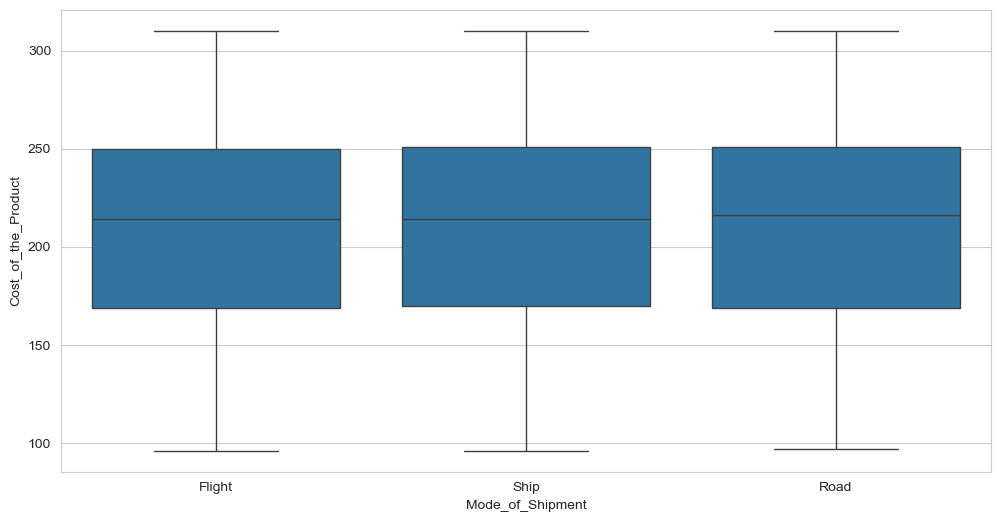

In [26]:
sns.boxplot(x="Mode_of_Shipment", y="Cost_of_the_Product", data=df)
plt.show()

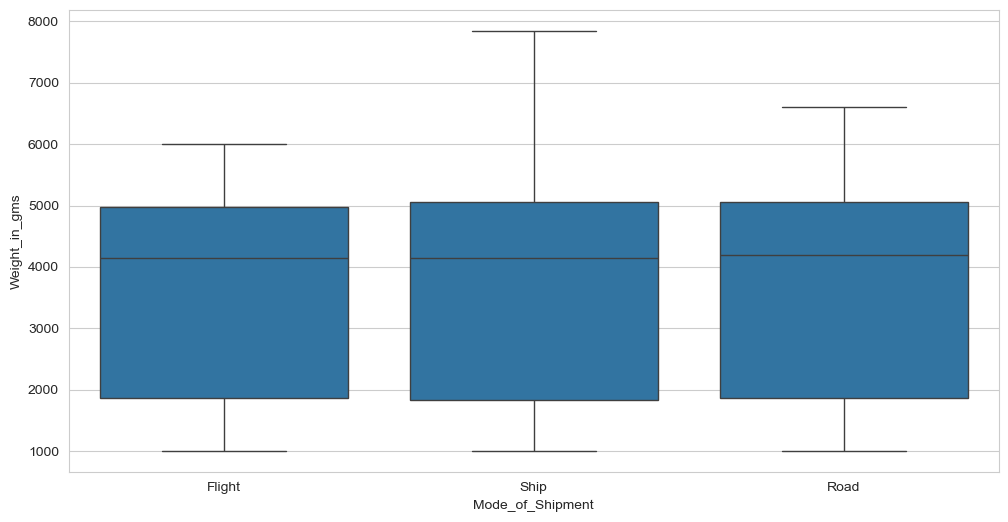

In [27]:
sns.boxplot(x="Mode_of_Shipment", y="Weight_in_gms", data=df)
plt.show()

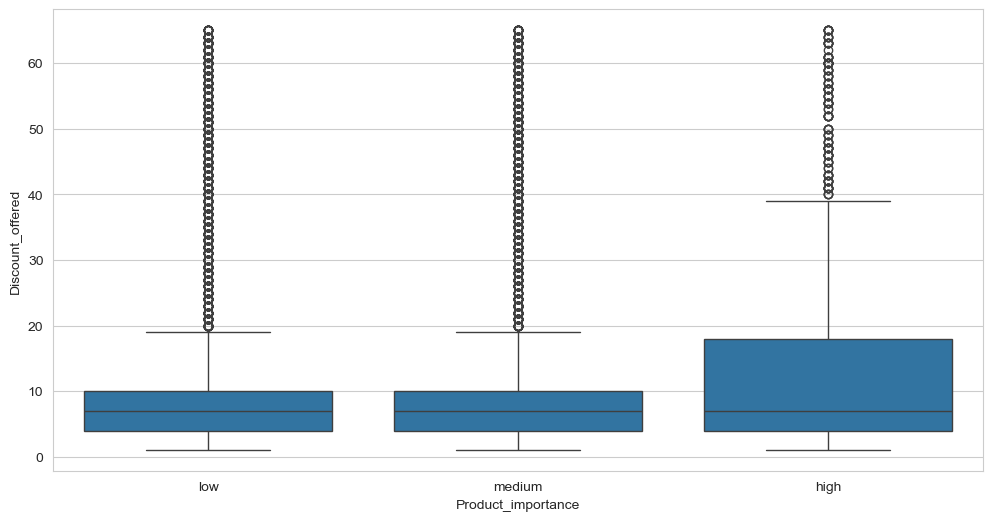

In [28]:
sns.boxplot(x="Product_importance", y="Discount_offered", data=df)
plt.show()

<p>The analysis of numerical–categorical interactions indicates that shipment mode does not significantly influence product cost or weight distribution. However, a moderate pattern is observed between product importance and discount offered, where high-importance products tend to receive slightly higher discounts. Overall, most categorical variables appear relatively independent from numerical features.</p>

<h1>2 Preprocessing</h1>

In [29]:
df_transformed = df.copy()

df_transformed["Weight_class"] = pd.cut(
    df_transformed["Weight_in_gms"],
    bins=[0, 2000, 4500, df_transformed["Weight_in_gms"].max()],
    labels=["Light", "Medium", "Heavy"]
)

df_transformed["Discount_class"] = pd.cut(
    df_transformed["Discount_offered"],
    bins=[0, 7, 20, df_transformed["Discount_offered"].max()],
    labels=["Low", "Medium", "High"]
)

In [30]:
df_transformed = df_transformed.drop(columns=[
    "Weight_in_gms",
    "Discount_offered",
    "Reached.on.Time_Y.N",
    "ID"
])

In [31]:
numerical_features = [
    "Cost_of_the_Product",
    "Prior_purchases",
    "Customer_rating",
    "Customer_care_calls"
]

categorical_features = [
    "Weight_class",
    "Mode_of_Shipment",
    "Product_importance",
    "Warehouse_block",
    "Discount_class"
]


In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)

X = preprocessor.fit_transform(df_transformed)

<p>Numerical features were standardized using StandardScaler, while categorical variables were encoded using One-Hot Encoding. Package weight was discretized into three ordinal categories based on observed distribution patterns, and discount offered was binarized to reduce skewness effects.</p>

In [33]:
cat_feature_names = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features)

all_feature_names = (
    numerical_features +
    list(cat_feature_names)
)

X_df = pd.DataFrame(X, columns=all_feature_names)

In [34]:
df_transformed.head()

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

  Weight_class Discount_class  
0        Light           High  
1       Medium           High  
2       Medium           High  
3        Light         Medium  
4       Medium           High

In [35]:
X_df.head()

Cost_of_the_Product  Prior_purchases  Customer_rating  Customer_care_calls  \
0            -0.690722        -0.372735        -0.700755            -0.047711   
1             0.120746        -1.029424         1.421578            -0.047711   
2            -0.565881         0.283954        -0.700755            -1.799887   
3            -0.711529         0.283954         0.006689            -0.923799   
4            -0.545074        -0.372735        -0.700755            -1.799887   

   Weight_class_Light  Weight_class_Medium  Mode_of_Shipment_Road  \
0                 1.0                  0.0                    0.0   
1                 0.0                  1.0                    0.0   
2                 0.0                  1.0                    0.0   
3                 1.0                  0.0                    0.0   
4                 0.0                  1.0                    0.0   

   Mode_of_Shipment_Ship  Product_importance_low  Product_importance_medium  \
0                    0.0                     1.0                        0.0   
1                    0.0                     1.0                        0.0   
2                    0.0                     1.0                        0.0   
3                    0.0                     0.0                        1.0   
4                    0.0                     0.0                        1.0   

   Warehouse_block_B  Warehouse_block_C  Warehouse_block_D  Warehouse_block_F  \
0                0.0                0.0                1.0                0.0   
1                0.0                0.0                0.0                1.0   
2                0.0                0.0                0.0                0.0   
3                1.0                0.0                0.0                0.0   
4                0.0                1.0                0.0                0.0   

   Discount_class_Low  Discount_class_Medium  
0                 0.0                    0.0  
1                 0.0                    0.0  
2                 0.0                    0.0  
3                 0.0                    1.0  
4                 0.0                    0.0

<h1></h1>

In [36]:
df_transformed["Discount_class"].value_counts()

Discount_class
Low       5846
Medium    3002
High      2151
Name: count, dtype: int64

In [37]:
df_transformed["Weight_class"].value_counts()

Weight_class
Heavy     4433
Medium    3321
Light     3245
Name: count, dtype: int64

In [38]:
X_df.shape

(10999, 16)

<h1>3 Clustering</h1>

<h2>3.1 K-Means</h2>

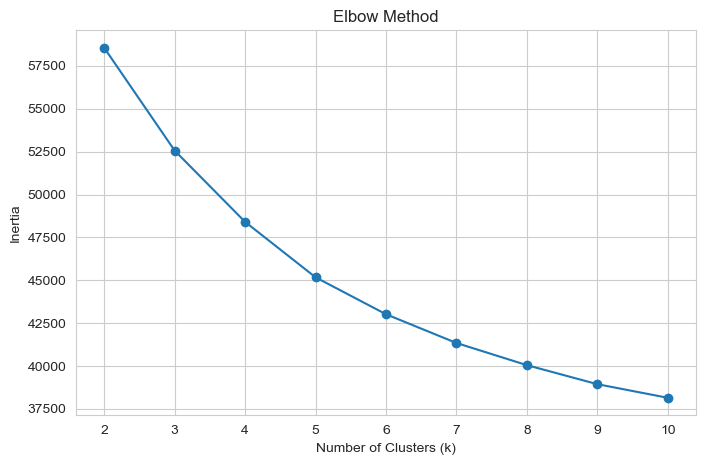

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [40]:
from sklearn.metrics import silhouette_score

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_df)
    score = silhouette_score(X_df, labels)
    print(f"k={k}, Silhouette Score={score:.4f}")

k=2, Silhouette Score=0.1786
k=3, Silhouette Score=0.1297
k=4, Silhouette Score=0.1437
k=5, Silhouette Score=0.1286
k=6, Silhouette Score=0.1173
k=7, Silhouette Score=0.1104
k=8, Silhouette Score=0.1084
k=9, Silhouette Score=0.1070
k=10, Silhouette Score=0.1049


<p>The highest silhouette score is achieved for k=2, suggesting that the dataset naturally forms two broad segments. Increasing the number of clusters results in decreased cohesion and separation, indicating that additional clusters may represent over-segmentation rather than meaningful structure. In the project, scenarios for n=2 and n=4 will be analyzed</p>

<h3>3.1.1 Two Clusters</h3>

In [41]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_df)

X_df["Cluster"] = labels

In [42]:
cluster_labels = X_df['Cluster']
n_clusters = len(cluster_labels.unique())


numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
                      'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


cluster_sizes = cluster_labels.value_counts().sort_index()
for cluster_id, size in cluster_sizes.items():
    percentage = (size / len(X_df)) * 100
    print(f"Cluster {cluster_id}: {size:,} samples ({percentage:.2f}%)")


Cluster 0: 7,570 samples (68.82%)
Cluster 1: 3,429 samples (31.18%)


<h4>3.1.1.1 Numerical feature profiling</h4>

In [43]:
df_profile = df.copy()
df_profile["Cluster"] = labels

In [44]:
numerical_cols = [
    "Cost_of_the_Product",
    "Prior_purchases",
    "Customer_rating",
    "Customer_care_calls",
    "Weight_in_gms",
    "Discount_offered"
]

cluster_numeric_profile = df_profile.groupby("Cluster")[numerical_cols].agg(
    ["mean", "std", "median", "min", "max"]
)

cluster_numeric_profile

Cost_of_the_Product                            Prior_purchases  \
                       mean        std median min  max            mean   
Cluster                                                                  
0                194.918494  43.731991  192.0  96  310        2.899207   
1                243.925926  39.181269  251.0  98  310        5.043161   

                                  ... Weight_in_gms                       \
              std median min max  ...          mean          std  median   
Cluster                           ...                                      
0        0.853064    3.0   2   8  ...   4007.241876  1485.246489  4410.5   
1        1.633732    5.0   2  10  ...   2810.069700  1650.149396  1875.0   

                    Discount_offered                            
          min   max             mean        std median min max  
Cluster                                                         
0        1001  7846        15.117173  17.382971    8.0   1  65  
1        1001  5995         9.523185  12.402801    6.0   1  65  

[2 rows x 30 columns]

In [45]:
mean_comparison = df_profile.groupby("Cluster")[numerical_cols].mean()
mean_comparison.loc["Difference (1-0)"] = mean_comparison.loc[1] - mean_comparison.loc[0]
mean_comparison

Cost_of_the_Product  Prior_purchases  Customer_rating  \
Cluster                                                                   
0                          194.918494         2.899207         2.985073   
1                          243.925926         5.043161         3.002625   
Difference (1-0)            49.007432         2.143954         0.017552   

                  Customer_care_calls  Weight_in_gms  Discount_offered  
Cluster                                                                 
0                            3.607662    4007.241876         15.117173  
1                            5.040828    2810.069700          9.523185  
Difference (1-0)             1.433166   -1197.172176         -5.593988

In [46]:
smd={}

for col in numerical_cols:
    mean0 = df_profile[df_profile["Cluster"] == 0][col].mean()
    mean1 = df_profile[df_profile["Cluster"] == 1][col].mean()
    std_pooled = np.sqrt(
        (
            df_profile[df_profile["Cluster"] == 0][col].std()**2 +
            df_profile[df_profile["Cluster"] == 1][col].std()**2
        ) / 2
    )
    smd[col] = (mean1 - mean0) / std_pooled

pd.Series(smd, name="Standardized Mean Difference").sort_values(ascending=False)

Prior_purchases        1.645112
Customer_care_calls    1.485984
Cost_of_the_Product    1.180361
Customer_rating        0.012401
Discount_offered      -0.370472
Weight_in_gms         -0.762596
Name: Standardized Mean Difference, dtype: float64

<p>The clustering results reveal two primary customer segments. The first cluster consists of customers with lower purchase activity and below-average product cost, typically associated with heavier shipments. The second cluster represents more active customers with higher prior purchases, higher product costs, and lighter shipments.</p>

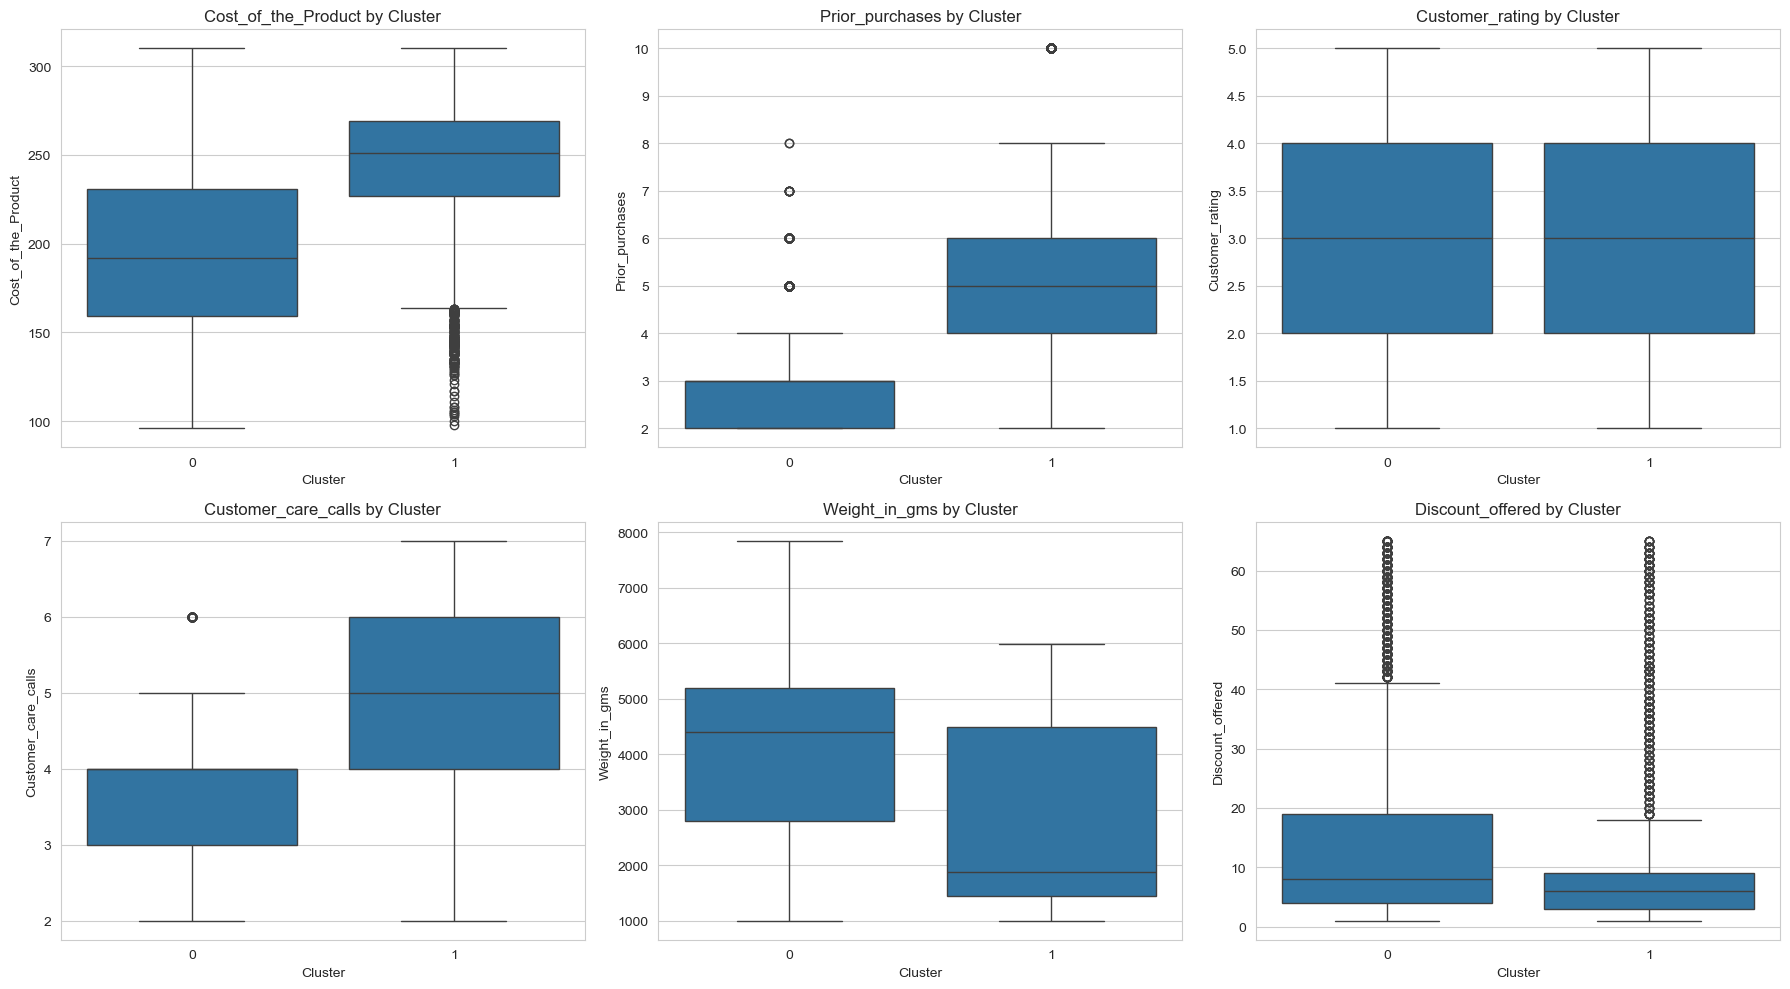

In [47]:
import math
n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(
        x="Cluster",
        y=col,
        data=df_profile,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Cluster")

plt.tight_layout()
plt.show()

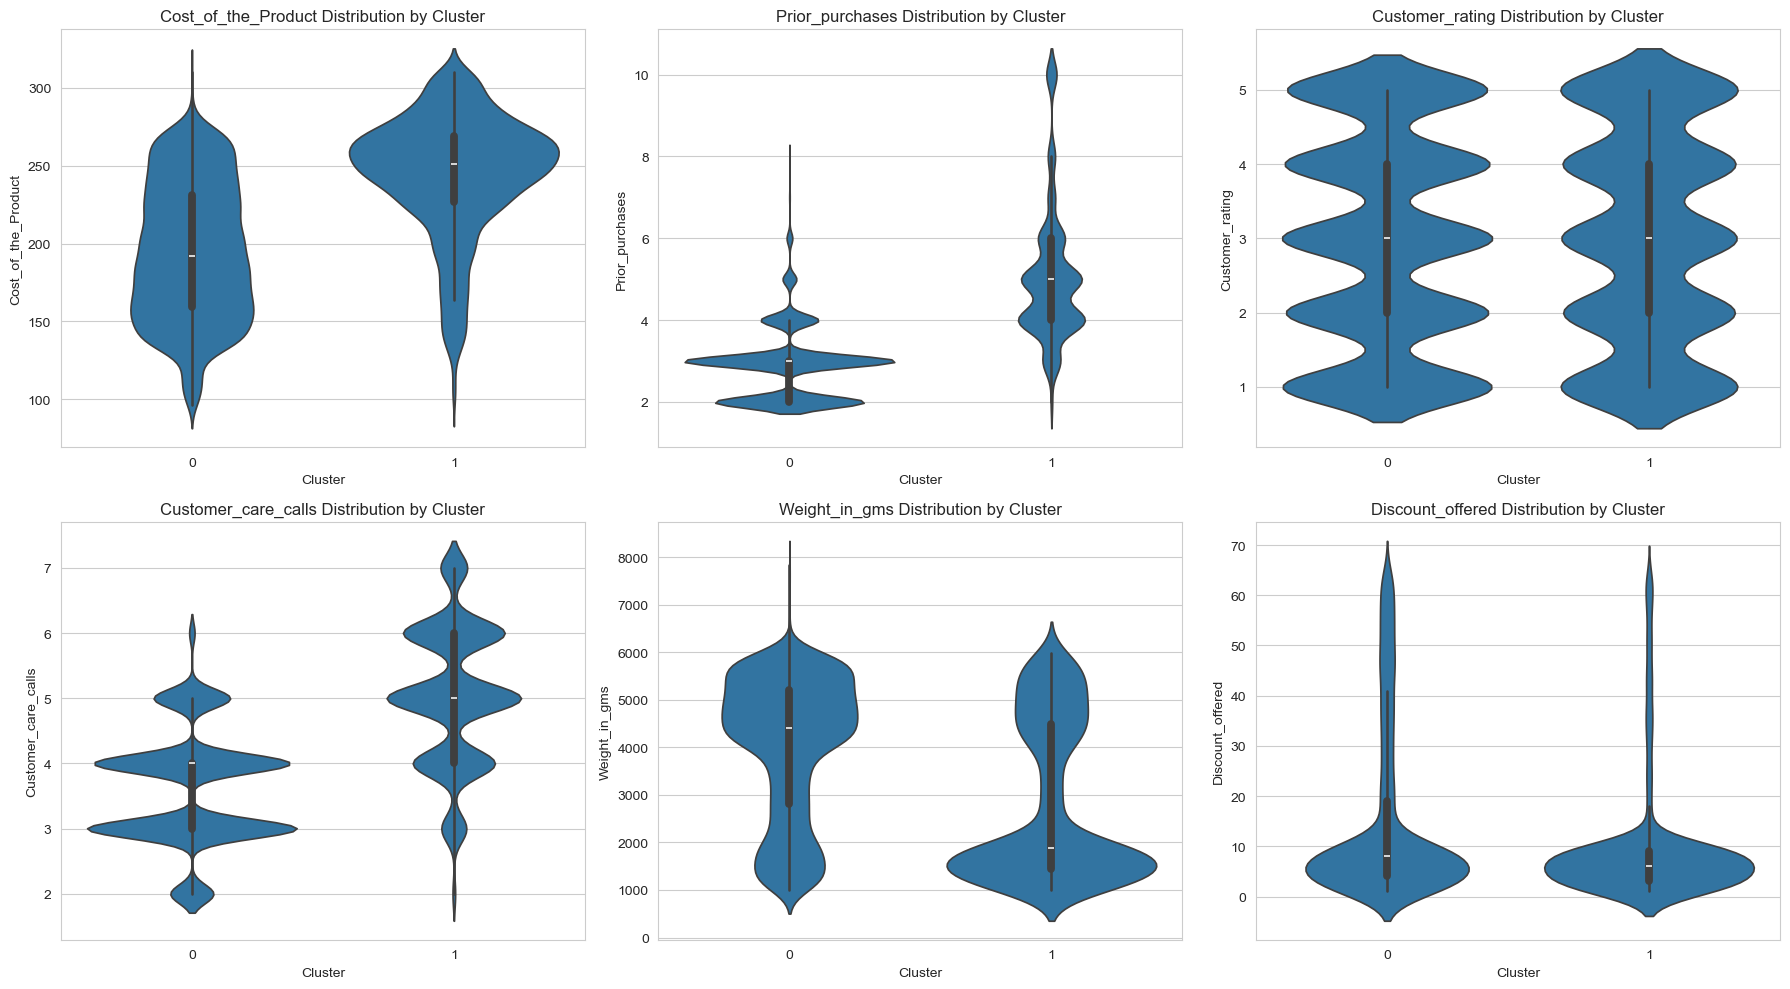

In [48]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(
        x="Cluster",
        y=col,
        data=df_profile,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} Distribution by Cluster")

plt.tight_layout()
plt.show()

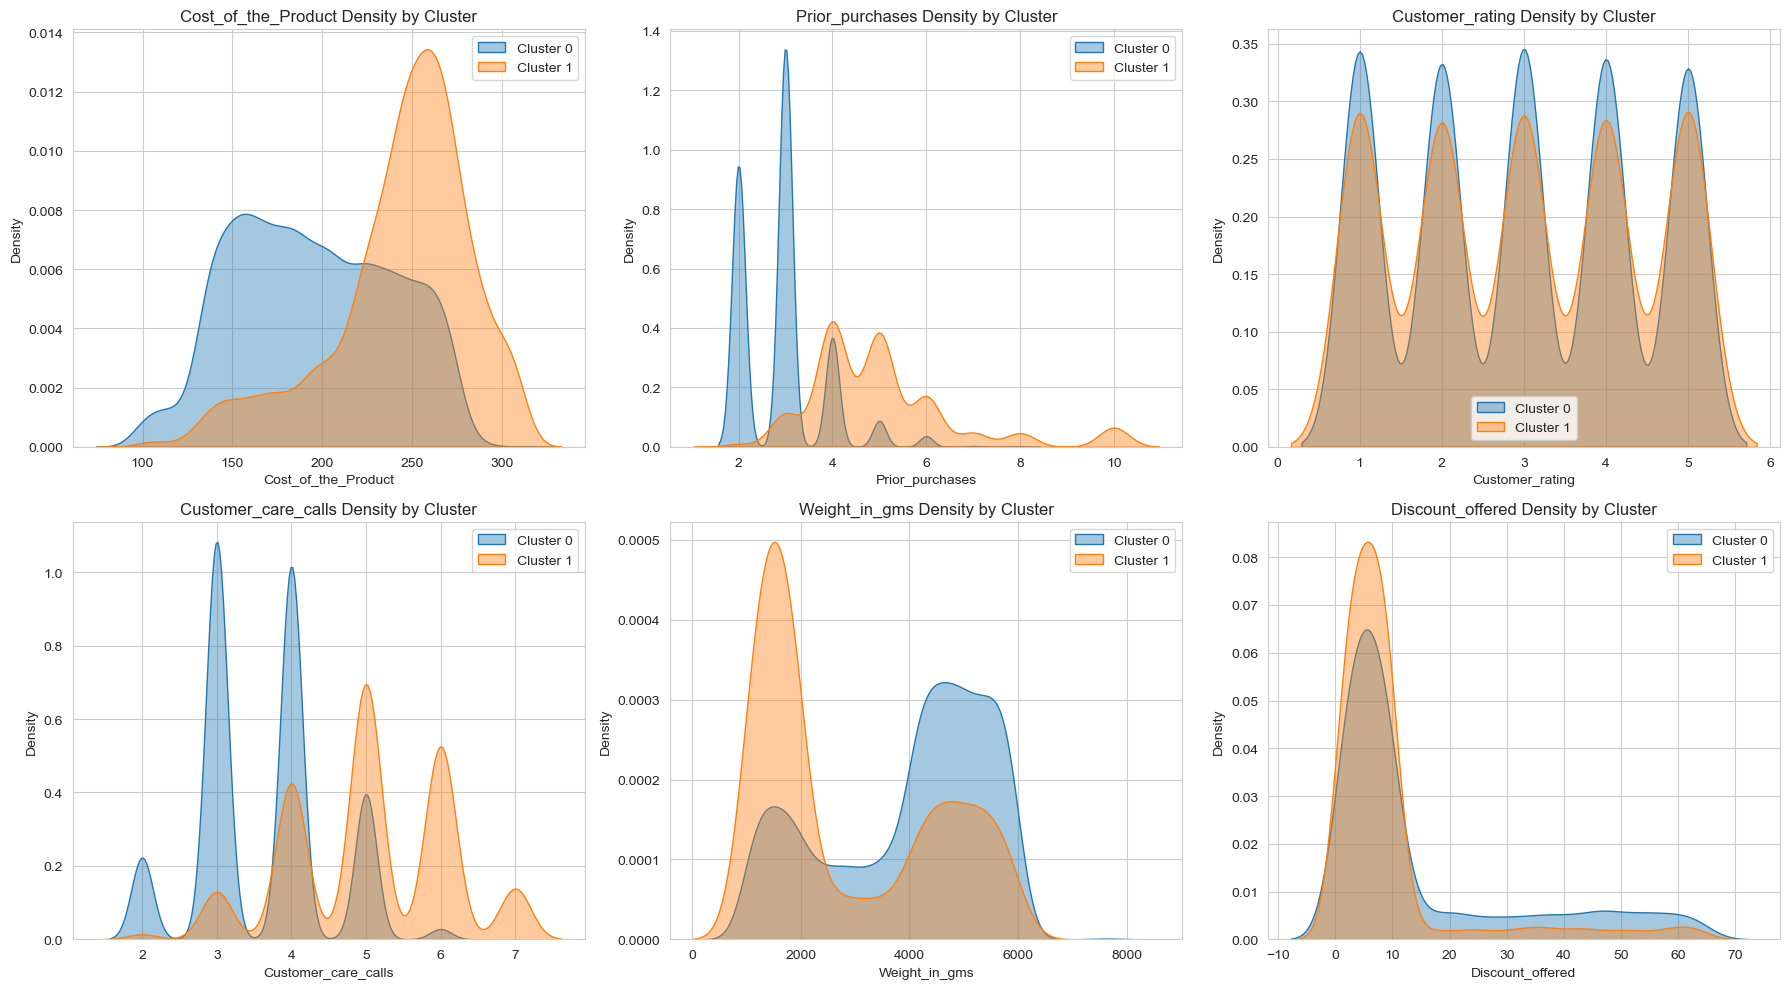

In [49]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    for cluster in sorted(df_profile["Cluster"].unique()):
        sns.kdeplot(
            data=df_profile[df_profile["Cluster"] == cluster],
            x=col,
            fill=True,
            alpha=0.4,
            ax=axes[i],
            label=f"Cluster {cluster}"
        )
    axes[i].set_title(f"{col} Density by Cluster")
    axes[i].legend()

plt.tight_layout()
plt.show()

<p>Plot analysis reveal clear structural differences between the two clusters. The strongest separation is observed for Weight_in_gms, Prior_purchases, and Cost_of_the_Product, where Cluster 1 exhibits higher median values for product cost and prior purchases, while Cluster 0 is characterized by significantly heavier products. Customer_care_calls shows moderate differentiation, with Cluster 1 having slightly higher values. In contrast, Customer_rating displays nearly identical distributions across clusters, indicating minimal contribution to segmentation. Overall, the visual distribution analysis confirms that product weight, purchase history, and product price are the primary drivers of cluster formation.</p>

<h4>3.1.1.2 Categorical feature profiling</h4>

In [50]:
categorical_cols = [
    "Mode_of_Shipment",
    "Product_importance",
    "Warehouse_block",
    "Gender",
]

for col in categorical_cols:
    print(f"\n===== {col} =====")
    display(
        pd.crosstab(
            df_profile["Cluster"],
            df_profile[col],
            normalize="index"
        )
    )


===== Mode_of_Shipment =====


Mode_of_Shipment    Flight      Road      Ship
Cluster                                       
0                 0.160634  0.159577  0.679789
1                 0.163605  0.160980  0.675416


===== Product_importance =====


Product_importance      high       low    medium
Cluster                                         
0                   0.093527  0.469749  0.436724
1                   0.069991  0.507728  0.422281


===== Warehouse_block =====


Warehouse_block         A         B         C         D         F
Cluster                                                          
0                0.166579  0.164861  0.167768  0.165918  0.334875
1                0.166812  0.170604  0.164188  0.168562  0.329834


===== Gender =====


Gender          F         M
Cluster                    
0        0.505416  0.494584
1        0.501312  0.498688

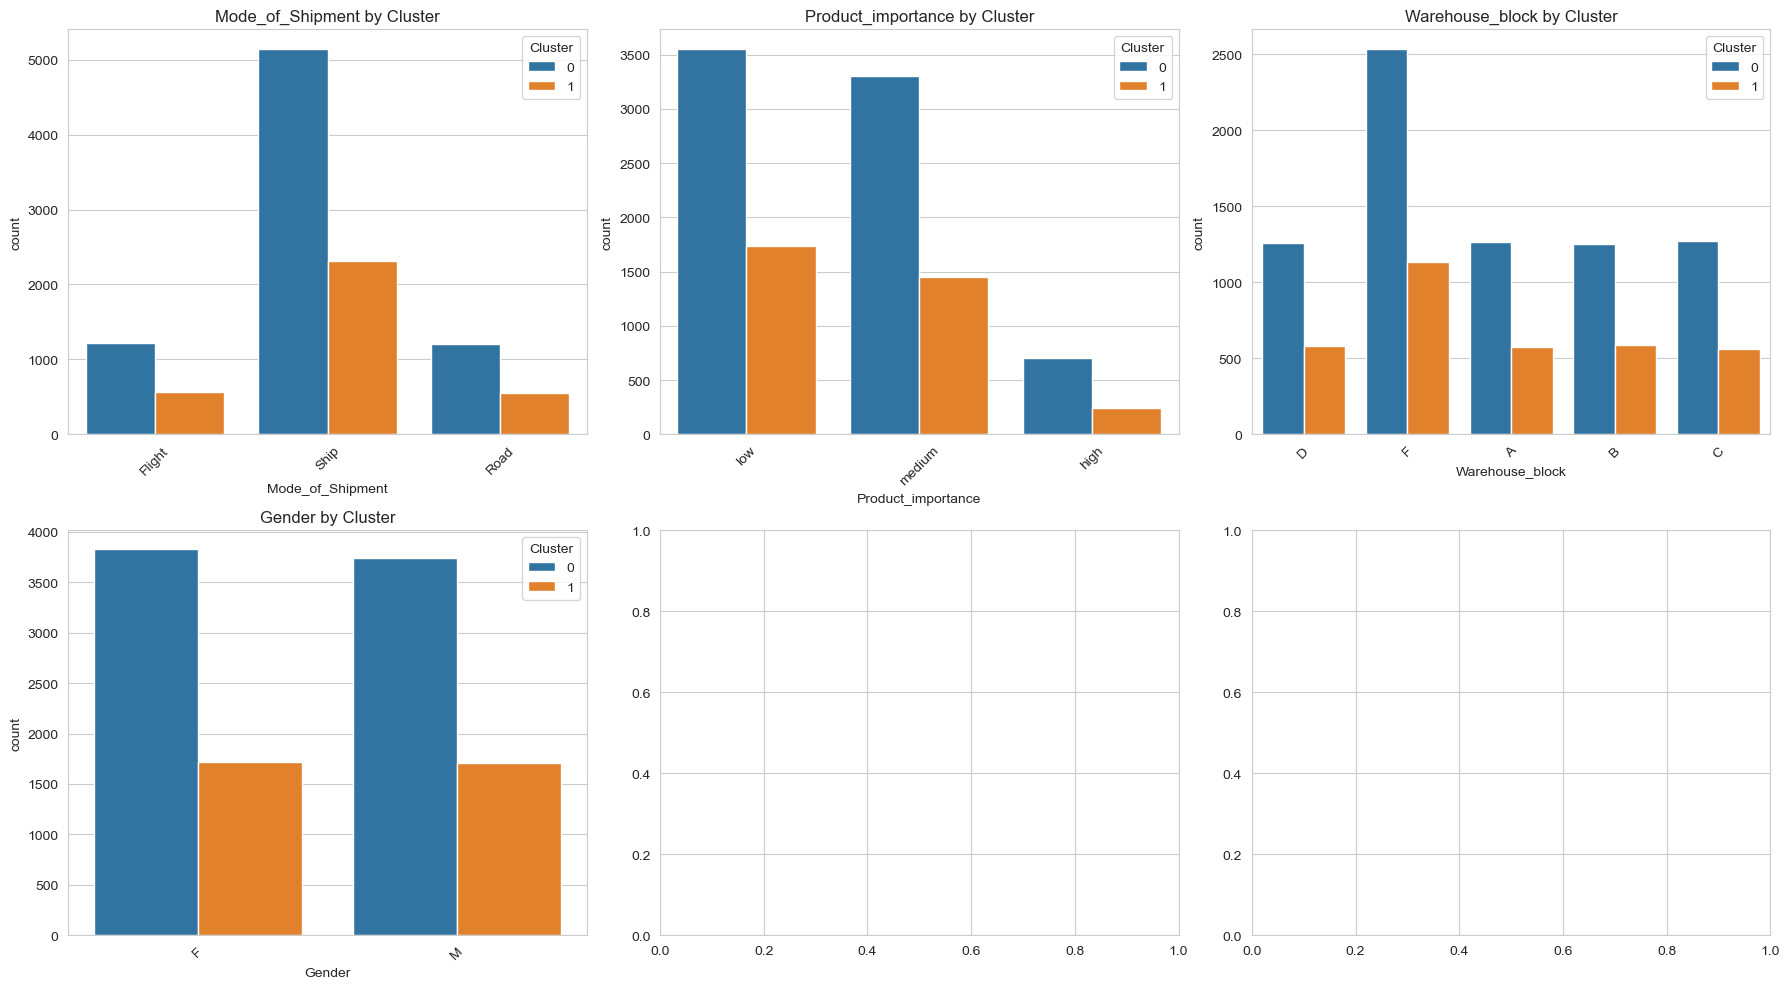

In [51]:
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=df_profile,
        x=col,
        hue="Cluster",
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Cluster")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

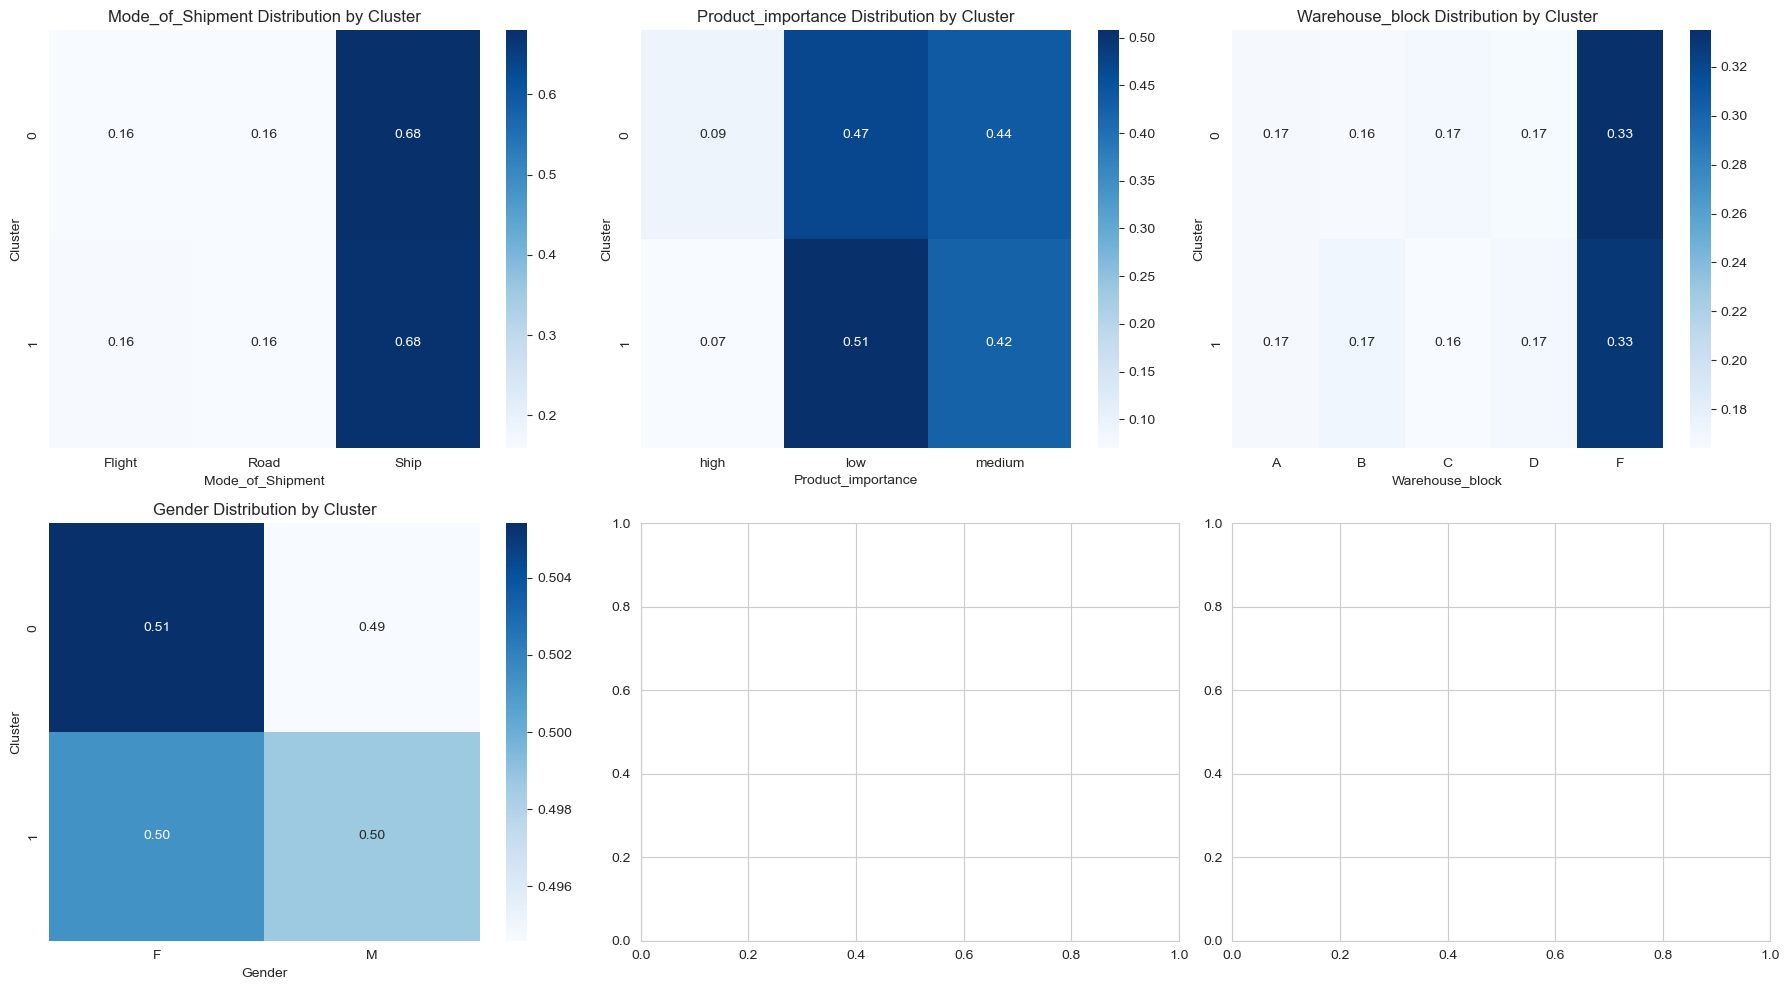

In [52]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ct = pd.crosstab(
        df_profile["Cluster"],
        df_profile[col],
        normalize="index"
    )
    
    sns.heatmap(
        ct,
        annot=True,
        cmap="Blues",
        fmt=".2f",
        ax=axes[i]
    )
    
    axes[i].set_title(f"{col} Distribution by Cluster")

plt.tight_layout()
plt.show()

In [53]:
from scipy.stats import chi2_contingency

chi_results = {}

for col in categorical_cols:
    contingency = pd.crosstab(df_profile["Cluster"], df_profile[col])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi_results[col] = p

pd.Series(chi_results, name="p-value").sort_values()

Product_importance    0.000008
Gender                0.705320
Mode_of_Shipment      0.893852
Warehouse_block       0.920499
Name: p-value, dtype: float64

<p>Chi-square testing indicates that only Product_importance shows statistically significant differences between clusters, while Gender, Mode_of_Shipment, and Warehouse_block distributions remain similar across clusters.</p>

Categorical feature analysis indicates that most categorical variables do not significantly differentiate clusters. Mode_of_Shipment, Warehouse_block, and Gender exhibit nearly identical distributions across clusters, confirmed by non-significant Chi-square test results. Although Product_importance shows statistical significance (p < 0.001), the proportional differences between clusters are relatively small, suggesting limited practical impact. Overall, cluster separation is primarily driven by numerical features rather than categorical attributes.

<h3>3.1.2 Four Clusters</h3>

In [54]:
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_4 = kmeans_4.fit_predict(X)

df_profile["Cluster_4"] = clusters_4

In [55]:
df_profile["Cluster_4"].value_counts()

Cluster_4
1    4594
2    3228
3    2447
0     730
Name: count, dtype: int64

<h4>3.1.2.1 Numerical feature profiling</h4>

In [56]:
cluster4_numeric_profile = df_profile.groupby("Cluster_4")[numerical_cols].agg(
    ["mean", "std", "median", "min", "max"]
)

cluster4_numeric_profile

Cost_of_the_Product                             Prior_purchases  \
                         mean        std median  min  max            mean   
Cluster_4                                                                   
0                  197.017808  47.215595  198.0   97  286        7.500000   
1                  196.311929  43.732213  195.0   96  296        2.915977   
2                  197.665737  43.616800  196.0   96  310        2.934634   
3                  256.726604  28.883843  258.0  121  310        4.452799   

                                    ... Weight_in_gms                       \
                std median min max  ...          mean          std  median   
Cluster_4                           ...                                      
0          1.593238    7.0   5  10  ...   4022.127397  1469.646837  4408.5   
1          0.800822    3.0   2   5  ...   4031.302569  1476.000323  4430.0   
2          0.840412    3.0   2   5  ...   3973.307621  1493.017195  4375.5   
3          0.899782    4.0   2   7  ...   2324.787904  1463.459652  1694.0   

                      Discount_offered                            
            min   max             mean        std median min max  
Cluster_4                                                         
0          1009  5995        14.412329  16.815096    7.5   1  65  
1          1001  7684        14.854593  17.199631    7.0   1  65  
2          1005  7846        15.256506  17.466029    8.0   1  65  
3          1001  5991         7.797711   9.917997    6.0   1  65  

[4 rows x 30 columns]

In [57]:
cluster4_numeric_profile = df_profile.groupby("Cluster_4")[numerical_cols].agg(
    ["mean", "std", "median", "min", "max"]
)

cluster4_numeric_profile

Cost_of_the_Product                             Prior_purchases  \
                         mean        std median  min  max            mean   
Cluster_4                                                                   
0                  197.017808  47.215595  198.0   97  286        7.500000   
1                  196.311929  43.732213  195.0   96  296        2.915977   
2                  197.665737  43.616800  196.0   96  310        2.934634   
3                  256.726604  28.883843  258.0  121  310        4.452799   

                                    ... Weight_in_gms                       \
                std median min max  ...          mean          std  median   
Cluster_4                           ...                                      
0          1.593238    7.0   5  10  ...   4022.127397  1469.646837  4408.5   
1          0.800822    3.0   2   5  ...   4031.302569  1476.000323  4430.0   
2          0.840412    3.0   2   5  ...   3973.307621  1493.017195  4375.5   
3          0.899782    4.0   2   7  ...   2324.787904  1463.459652  1694.0   

                      Discount_offered                            
            min   max             mean        std median min max  
Cluster_4                                                         
0          1009  5995        14.412329  16.815096    7.5   1  65  
1          1001  7684        14.854593  17.199631    7.0   1  65  
2          1005  7846        15.256506  17.466029    8.0   1  65  
3          1001  5991         7.797711   9.917997    6.0   1  65  

[4 rows x 30 columns]

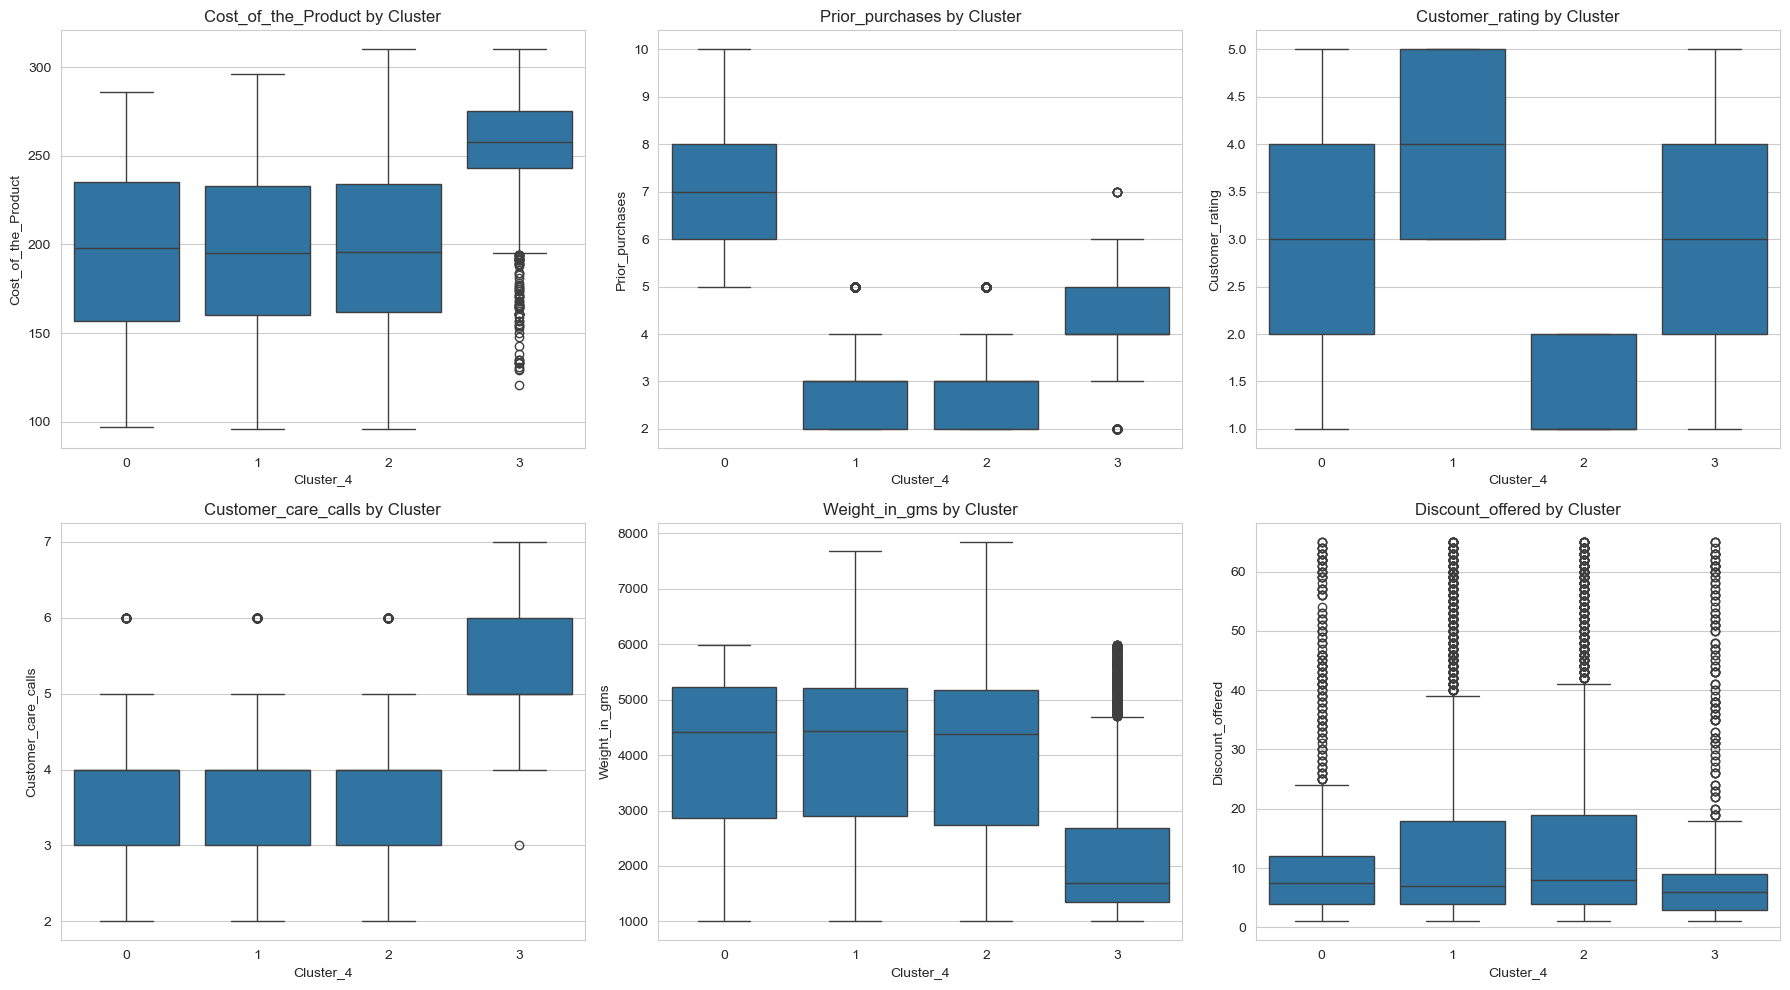

In [58]:
import math
n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(
        x="Cluster_4",
        y=col,
        data=df_profile,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Cluster")

plt.tight_layout()
plt.show()

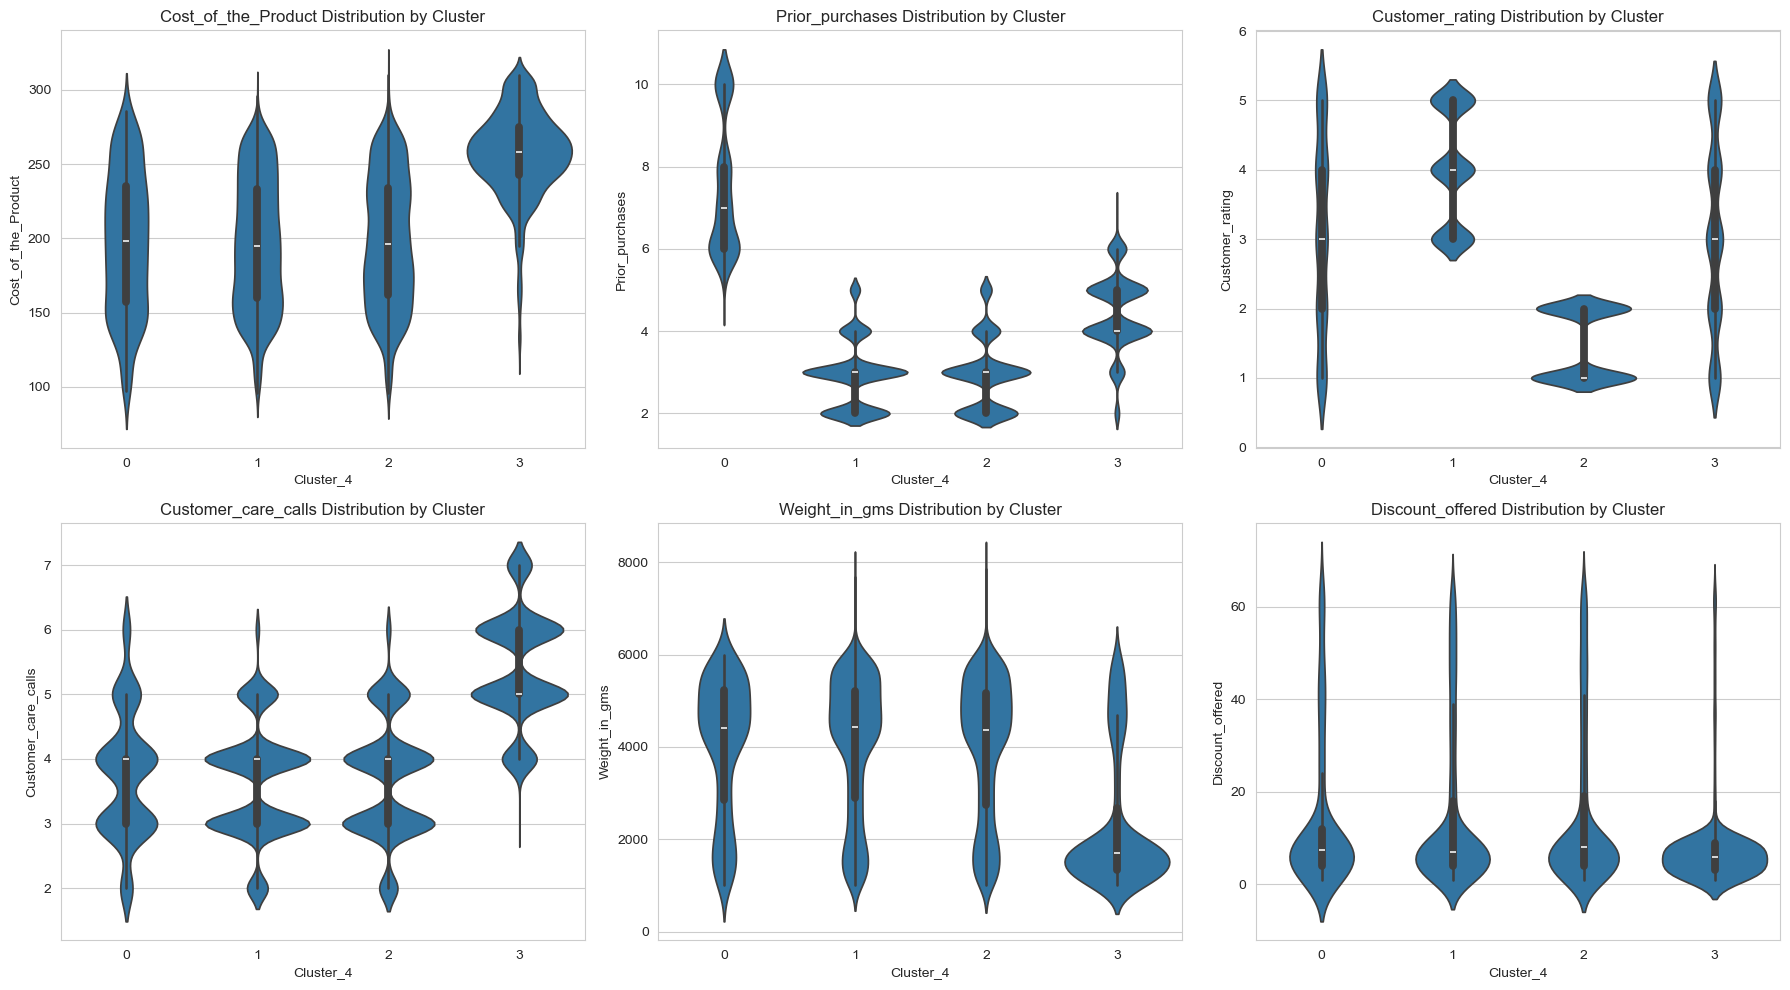

In [59]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(
        x="Cluster_4",
        y=col,
        data=df_profile,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} Distribution by Cluster")

plt.tight_layout()
plt.show()

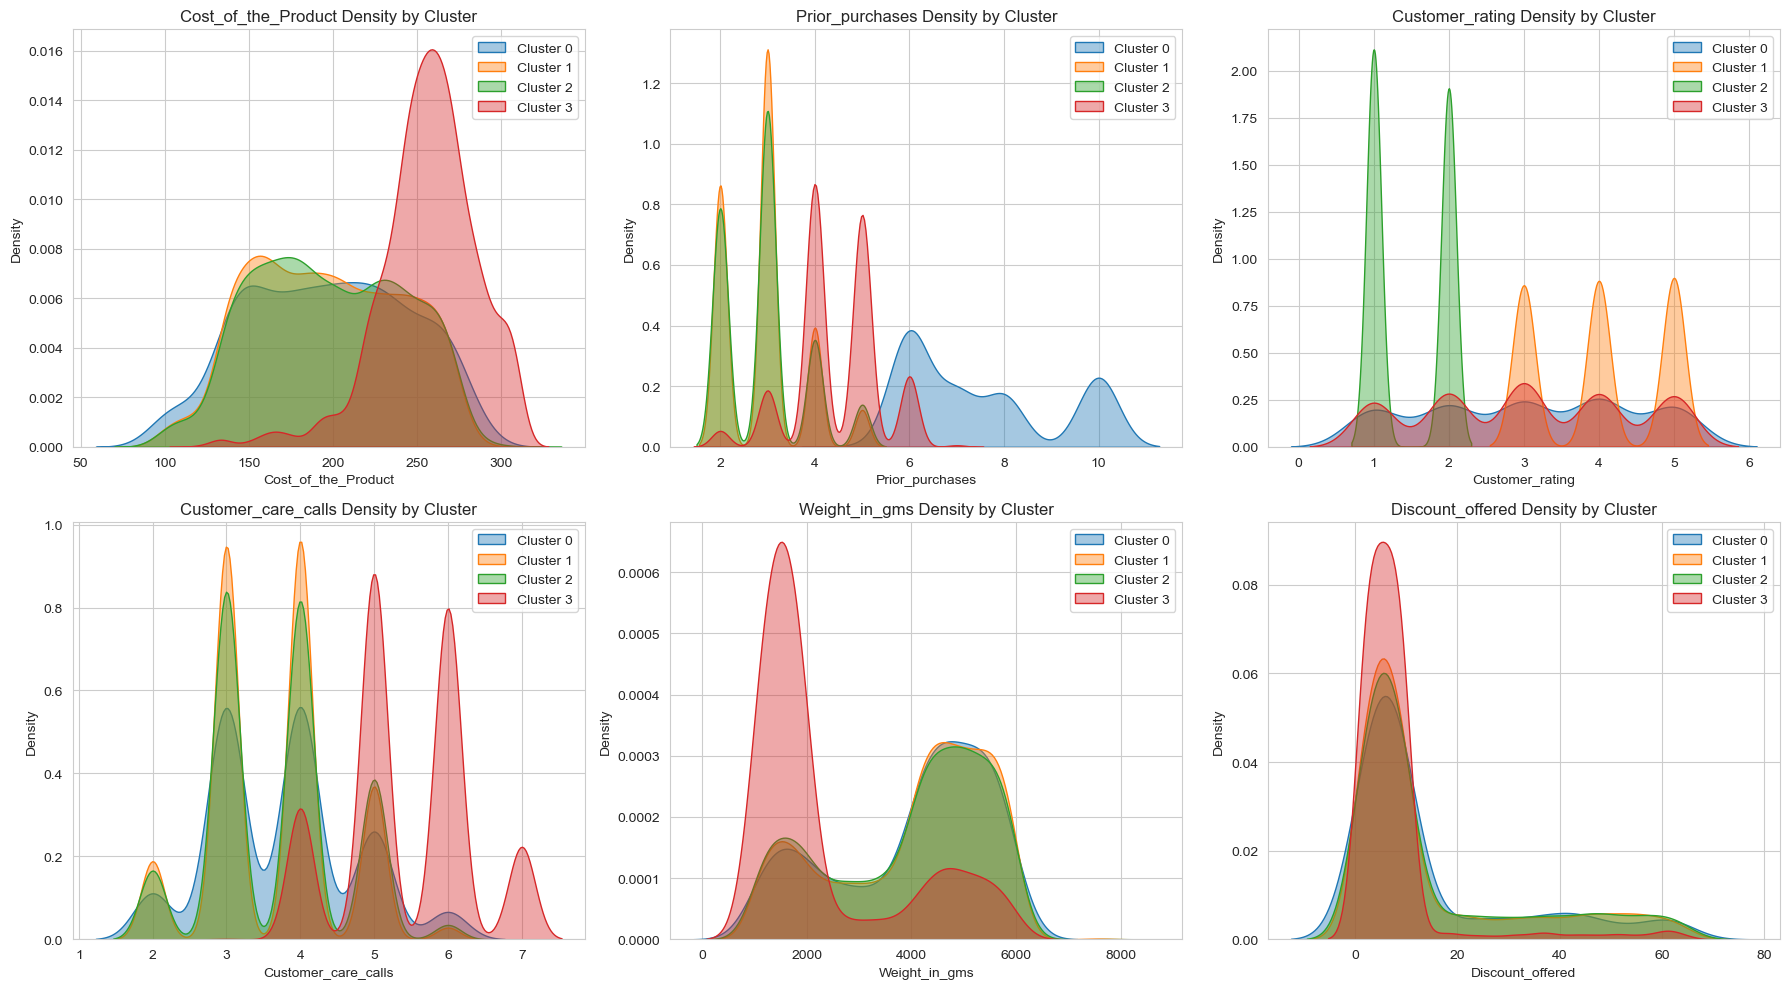

In [60]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    for cluster in sorted(df_profile["Cluster_4"].unique()):
        sns.kdeplot(
            data=df_profile[df_profile["Cluster_4"] == cluster],
            x=col,
            fill=True,
            alpha=0.4,
            ax=axes[i],
            label=f"Cluster {cluster}"
        )
    axes[i].set_title(f"{col} Density by Cluster")
    axes[i].legend()

plt.tight_layout()
plt.show()

<h4>3.1.2.2 Categorical feature profiling</h4>

In [61]:
for col in categorical_cols:
    print(f"\n===== {col} =====")
    display(
        pd.crosstab(
            df_profile["Cluster_4"],
            df_profile[col],
            normalize="index"
        )
    )


===== Mode_of_Shipment =====


Mode_of_Shipment    Flight      Road      Ship
Cluster_4                                     
0                 0.156164  0.156164  0.687671
1                 0.157162  0.161297  0.681541
2                 0.166357  0.154275  0.679368
3                 0.165100  0.166326  0.668574


===== Product_importance =====


Product_importance      high       low    medium
Cluster_4                                       
0                   0.150685  0.312329  0.536986
1                   0.092730  0.464301  0.442969
2                   0.096964  0.476146  0.426890
3                   0.040458  0.571720  0.387822


===== Warehouse_block =====


Warehouse_block         A         B         C         D         F
Cluster_4                                                        
0                0.164384  0.180822  0.165753  0.157534  0.331507
1                0.160644  0.163039  0.170004  0.171093  0.335220
2                0.177200  0.169455  0.164188  0.158302  0.330855
3                0.164691  0.165509  0.163874  0.172456  0.333470


===== Gender =====


Gender            F         M
Cluster_4                    
0          0.521918  0.478082
1          0.506530  0.493470
2          0.497522  0.502478
3          0.503065  0.496935

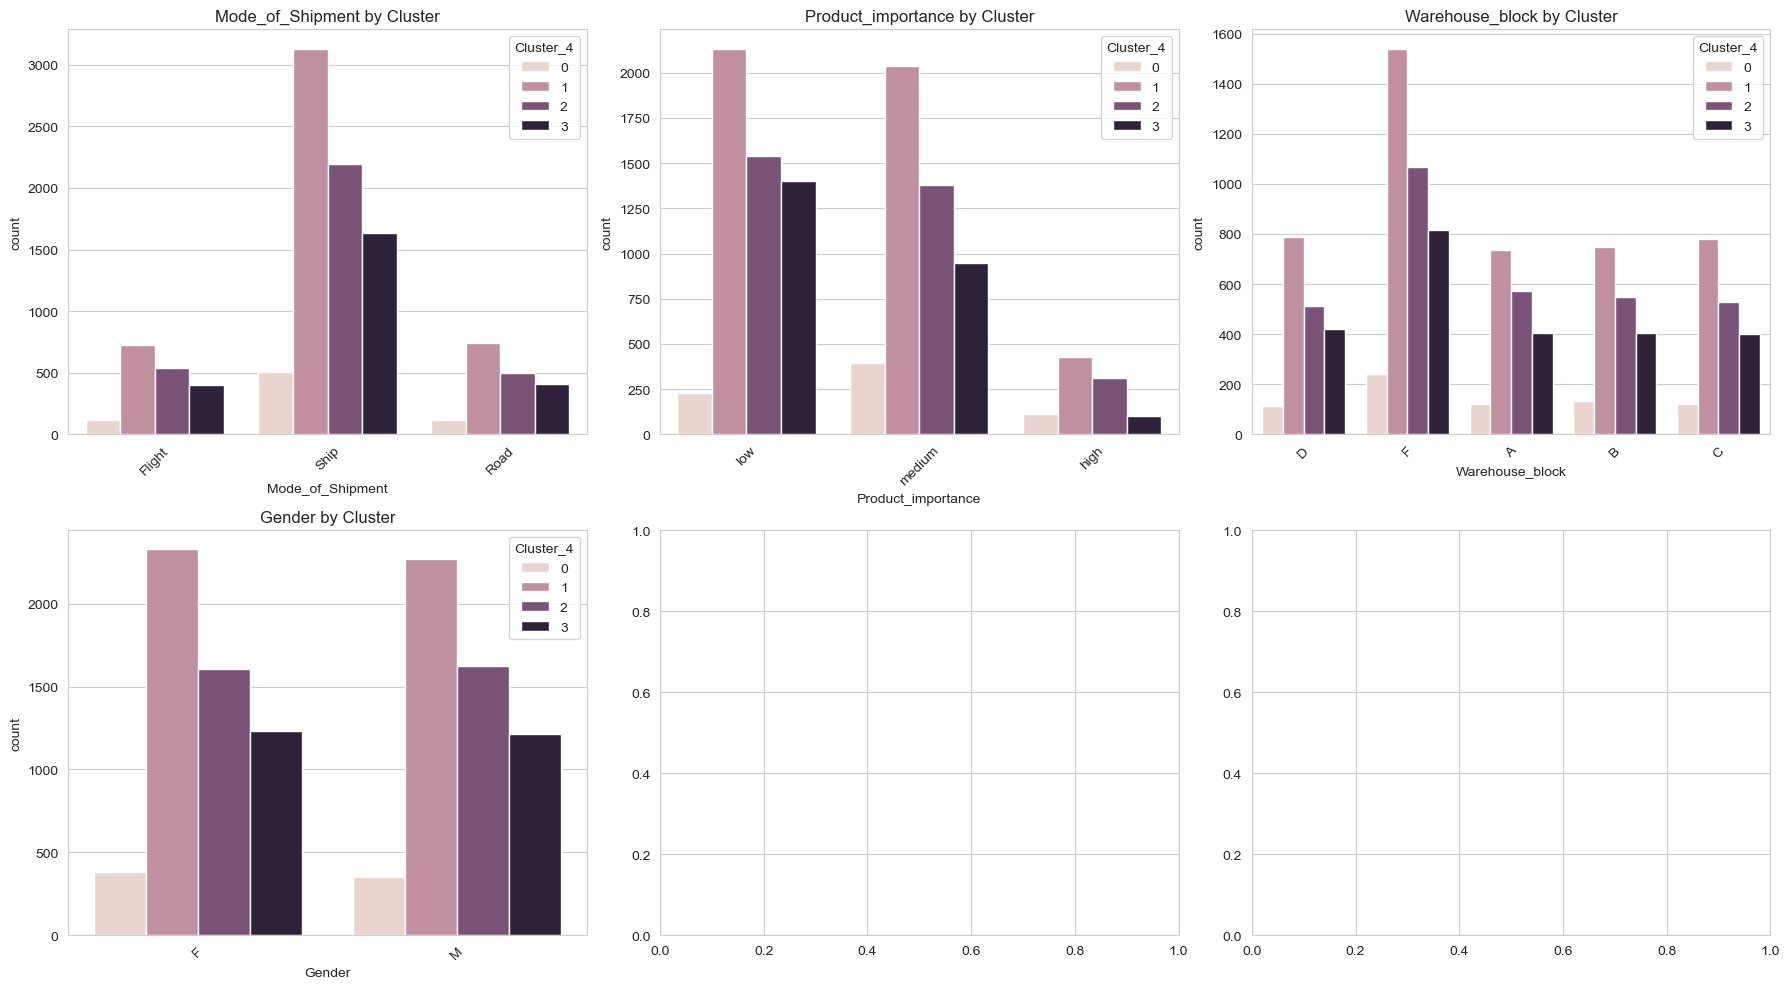

In [62]:
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=df_profile,
        x=col,
        hue="Cluster_4",
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Cluster")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

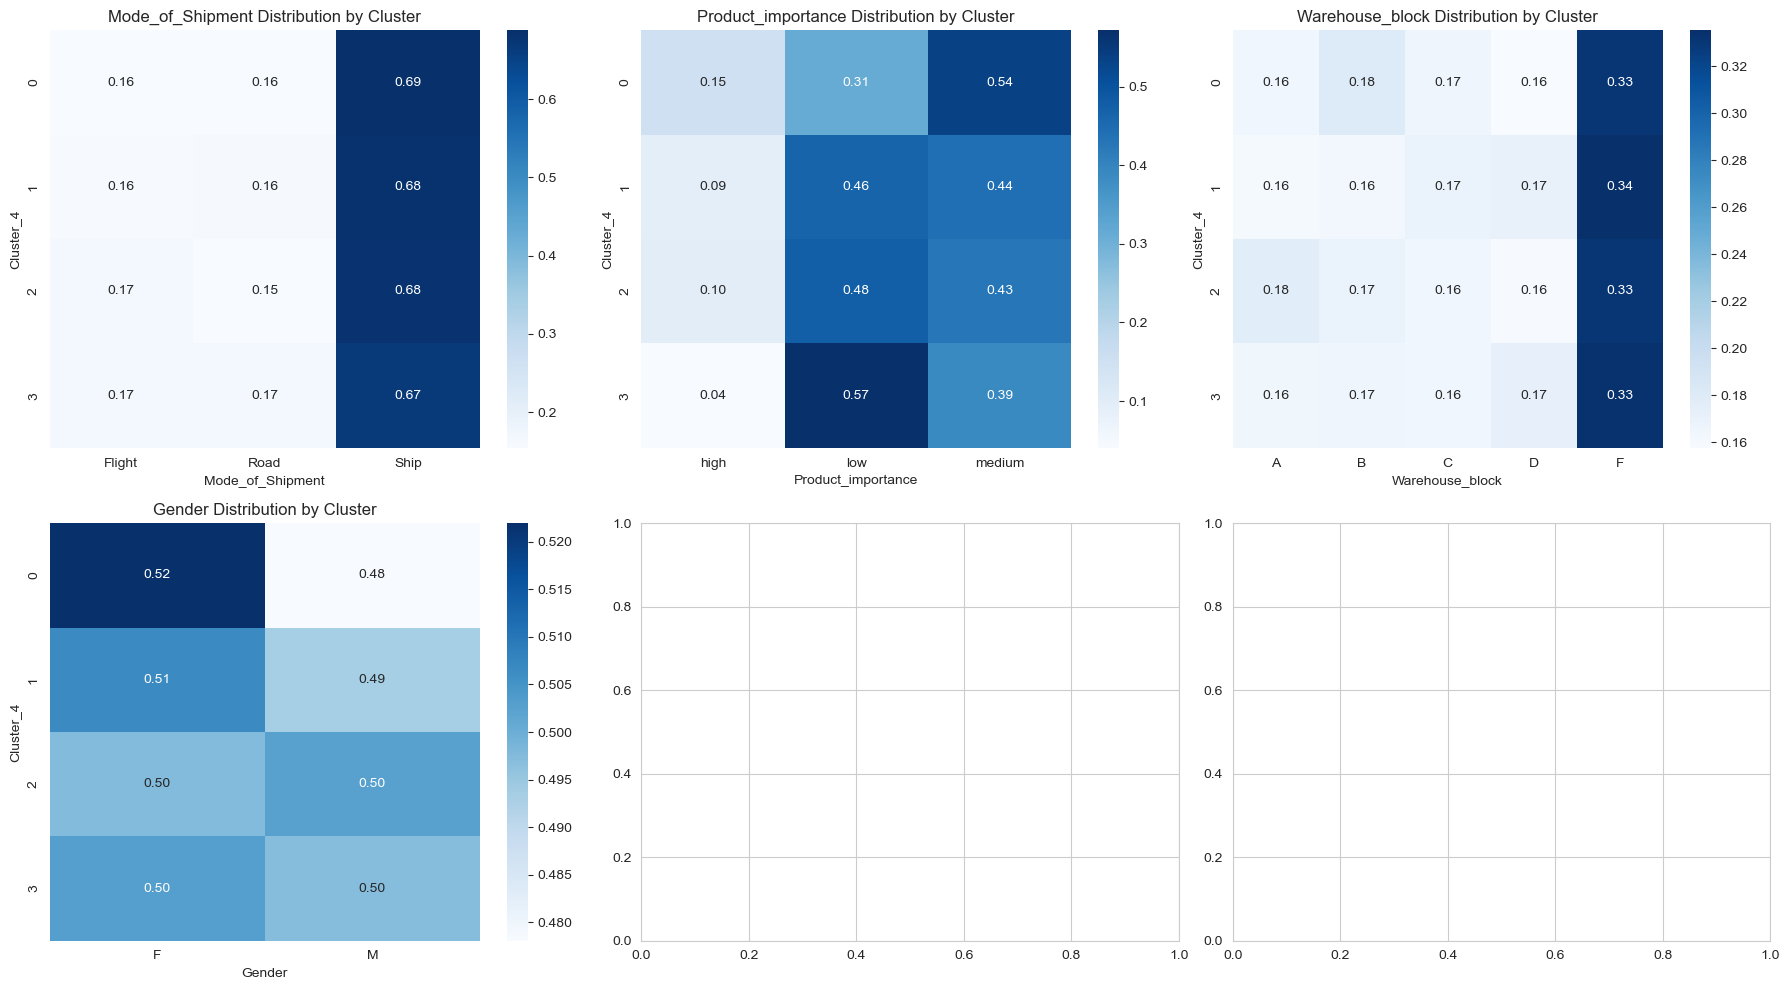

In [63]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ct = pd.crosstab(
        df_profile["Cluster_4"],
        df_profile[col],
        normalize="index"
    )
    
    sns.heatmap(
        ct,
        annot=True,
        cmap="Blues",
        fmt=".2f",
        ax=axes[i]
    )
    
    axes[i].set_title(f"{col} Distribution by Cluster")

plt.tight_layout()
plt.show()

In [64]:
from scipy.stats import chi2_contingency

chi_results = {}

for col in categorical_cols:
    contingency = pd.crosstab(df_profile["Cluster_4"], df_profile[col])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi_results[col] = p

pd.Series(chi_results, name="p-value").sort_values()

Product_importance    9.777579e-45
Gender                6.582908e-01
Mode_of_Shipment      7.792370e-01
Warehouse_block       7.811720e-01
Name: p-value, dtype: float64

<p>The k=4 solution provides a more granular segmentation, but only two clusters show clear differentiation (loyal customers and lightweight product buyers). The remaining clusters overlap in both numerical and categorical features. Silhouette analysis confirms that k=2 offers a more natural partition of the dataset, while k=4 introduces over-segmentation without substantial improvement in cluster separability.</p>

<h3>3.1.3 Two vs Four Clusters comparation</h3>

In [65]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
X_pca_full = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

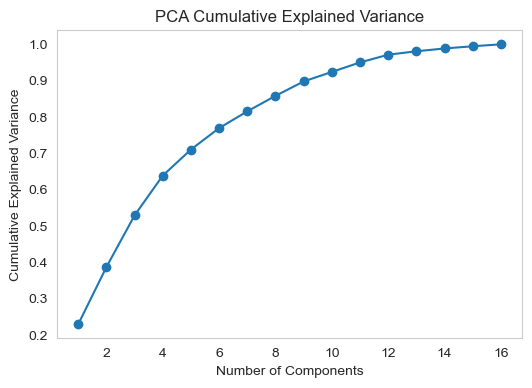

In [66]:
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Explained Variance")
plt.grid()
plt.show()

<p>The cumulative explained variance curve shows that no dominant principal component exists. Approximately 7 components are required to explain 80% of the variance, indicating that the dataset does not lie on a low-dimensional manifold. This supports the relatively low silhouette scores observed during clustering, suggesting weak inherent cluster structure.</p>

In [67]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X)

df_profile["PC1"] = X_pca_2[:,0]
df_profile["PC2"] = X_pca_2[:,1]

print("Explained variance (2 components):", pca_2.explained_variance_ratio_)

Explained variance (2 components): [0.22939991 0.15734942]


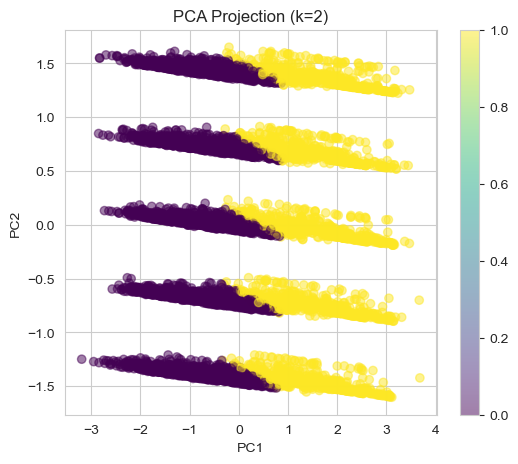

In [68]:
plt.figure(figsize=(6,5))
plt.scatter(df_profile["PC1"], df_profile["PC2"], 
            c=df_profile["Cluster"], cmap="viridis", alpha=0.5)
plt.title("PCA Projection (k=2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

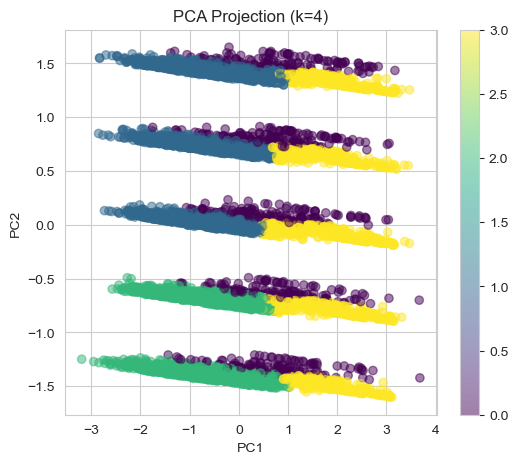

In [69]:
plt.figure(figsize=(6,5))
plt.scatter(df_profile["PC1"], df_profile["PC2"], 
            c=df_profile["Cluster_4"], cmap="viridis", alpha=0.5)
plt.title("PCA Projection (k=4)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

<p>k=2: Separation occurs primarily along PC1, indicating that a dominant latent dimension drives the segmentation.</p>

<p>k=4: The additional clusters mainly subdivide one of the main groups, leading to overlapping regions in PCA space and reduced silhouette score</p>

<h2>3.2 Hierarchical</h2>

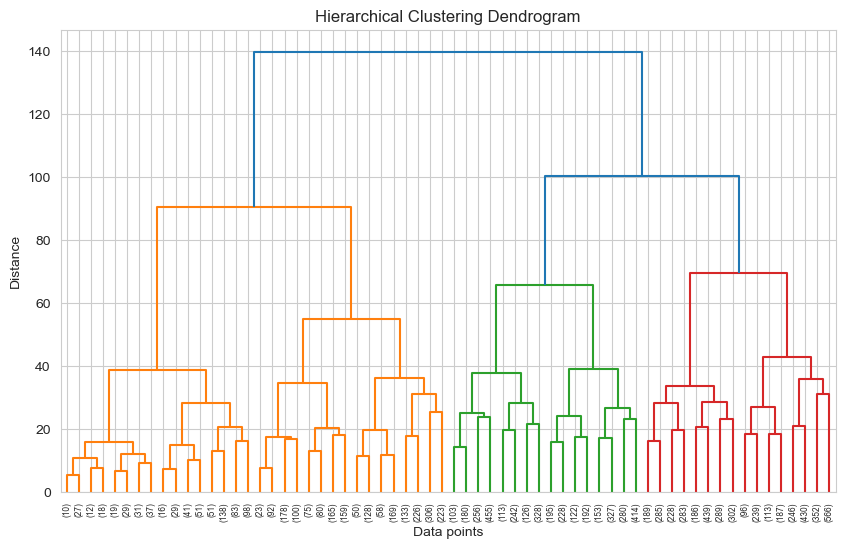

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X, method='ward')

plt.figure(figsize=(10,6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

In [71]:
from sklearn.cluster import AgglomerativeClustering

agg_2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_agg_2 = agg_2.fit_predict(X)

agg_4 = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_agg_4 = agg_4.fit_predict(X)

In [72]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

print("Agglomerative k=2")
print("Silhouette:", silhouette_score(X, labels_agg_2))
print("Davies-Bouldin:", davies_bouldin_score(X, labels_agg_2))
print("Calinski-Harabasz:", calinski_harabasz_score(X, labels_agg_2))

print("\nAgglomerative k=4")
print("Silhouette:", silhouette_score(X, labels_agg_4))
print("Davies-Bouldin:", davies_bouldin_score(X, labels_agg_4))
print("Calinski-Harabasz:", calinski_harabasz_score(X, labels_agg_4))

Agglomerative k=2
Silhouette: 0.1783734533301324
Davies-Bouldin: 2.1748212191236935
Calinski-Harabasz: 1788.8813469342374

Agglomerative k=4
Silhouette: 0.11537480246289003
Davies-Bouldin: 2.1638419918853953
Calinski-Harabasz: 1359.796503470233


<p>Both K-Means and Agglomerative clustering consistently indicate that k=2 is the most appropriate number of clusters. Silhouette and Calinski-Harabasz scores decrease significantly for k=4, while Davies-Bouldin index remains relatively high in both cases. Hierarchical dendrogram analysis further supports the presence of two dominant clusters with additional subdivisions occurring at considerably smaller linkage distances.</p>

<h2>3.3 DBSCAN</h2>

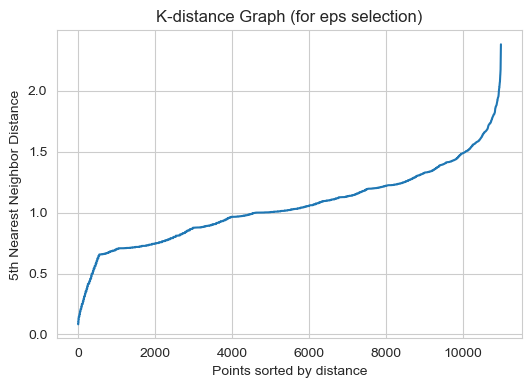

In [73]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:,4])

plt.figure(figsize=(6,4))
plt.plot(distances)
plt.title("K-distance Graph (for eps selection)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

In [74]:
from sklearn.cluster import DBSCAN
for eps in [1.2, 1.4, 1.6, 1.7]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    print(f"\neps={eps}")
    print("Clusters:", n_clusters)
    print("Noise points:", n_noise)
    print("Noise percentage:", n_noise / len(labels))


eps=1.2
Clusters: 12
Noise points: 1828
Noise percentage: 0.16619692699336303

eps=1.4
Clusters: 11
Noise points: 695
Noise percentage: 0.06318756250568233

eps=1.6
Clusters: 5
Noise points: 226
Noise percentage: 0.02054732248386217

eps=1.7
Clusters: 3
Noise points: 119
Noise percentage: 0.010819165378670788


<p>DBSCAN does not reveal stable density-separated clusters. The number of detected clusters varies significantly with small changes in epsilon, and the majority of observations consistently form a single dominant cluster.</p>

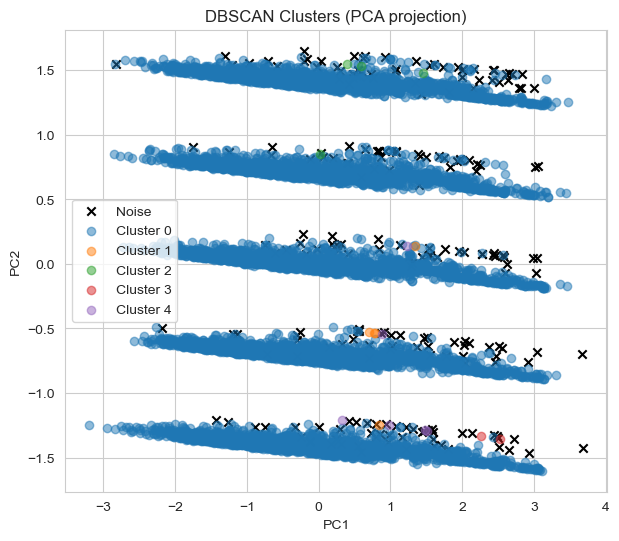

In [75]:
plt.figure(figsize=(7,6))

dbscan = DBSCAN(eps=1.6, min_samples=5)
labels_db = dbscan.fit_predict(X)

df_profile["Cluster_DB"] = labels_db

unique_labels = np.unique(df_profile["Cluster_DB"])

for label in unique_labels:
    if label == -1:
        plt.scatter(df_profile[df_profile["Cluster_DB"] == label]["PC1"],
                    df_profile[df_profile["Cluster_DB"] == label]["PC2"],
                    c="black", marker="x", label="Noise")
    else:
        plt.scatter(df_profile[df_profile["Cluster_DB"] == label]["PC1"],
                    df_profile[df_profile["Cluster_DB"] == label]["PC2"],
                    alpha=0.5, label=f"Cluster {label}")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN Clusters (PCA projection)")
plt.legend()
plt.show()

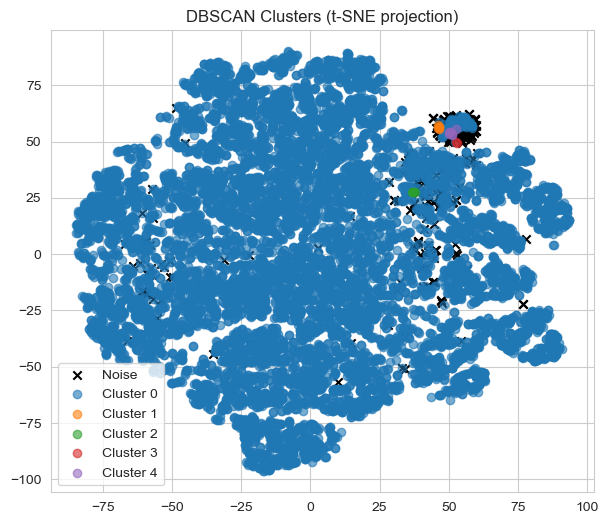

In [76]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

df_profile["TSNE1"] = X_tsne[:,0]
df_profile["TSNE2"] = X_tsne[:,1]

plt.figure(figsize=(7,6))

for label in np.unique(df_profile["Cluster_DB"]):
    if label == -1:
        plt.scatter(df_profile[df_profile["Cluster_DB"] == label]["TSNE1"],
                    df_profile[df_profile["Cluster_DB"] == label]["TSNE2"],
                    c="black", marker="x", label="Noise")
    else:
        plt.scatter(df_profile[df_profile["Cluster_DB"] == label]["TSNE1"],
                    df_profile[df_profile["Cluster_DB"] == label]["TSNE2"],
                    alpha=0.6, label=f"Cluster {label}")

plt.title("DBSCAN Clusters (t-SNE projection)")
plt.legend()
plt.show()

<p>Both PCA and t-SNE visualizations confirm the absence of well separated density islands. This means that the dataset exhibits a continuous structure rather than clearly defined density-based groupings.</p>

<h1>4 Outlier handling</h1>

In [77]:
import numpy as np

df_no_outliers = df.copy()

numeric_cols = [
    "Cost_of_the_Product",
    "Prior_purchases",
    "Customer_rating",
    "Customer_care_calls",
    "Weight_in_gms",
    "Discount_offered"
]

for col in numeric_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_no_outliers = df_no_outliers[
        (df_no_outliers[col] >= lower) &
        (df_no_outliers[col] <= upper)
    ]

print("Original size:", len(df_profile)) 
print("After outlier removal:", len(df_no_outliers))

Original size: 10999
After outlier removal: 7971


In [78]:
df_no_outliers.describe()

ID  Customer_care_calls  Customer_rating  \
count   7971.000000          7971.000000      7971.000000   
mean    6460.916949             4.132982         2.993602   
std     2750.646370             1.177638         1.413356   
min        4.000000             2.000000         1.000000   
25%     4380.500000             3.000000         2.000000   
50%     6561.000000             4.000000         3.000000   
75%     8782.500000             5.000000         4.000000   
max    10999.000000             7.000000         5.000000   

       Cost_of_the_Product  Prior_purchases  Discount_offered  Weight_in_gms  \
count          7971.000000      7971.000000       7971.000000    7971.000000   
mean            213.686238         3.282148          5.986953    3956.695772   
std              48.231331         0.991333          3.547644    1619.385342   
min              96.000000         2.000000          1.000000    1001.000000   
25%             173.000000         3.000000          3.000000    1955.500000   
50%             220.000000         3.000000          6.000000    4520.000000   
75%             254.000000         4.000000          8.000000    5244.000000   
max             310.000000         5.000000         19.000000    6102.000000   

       Reached.on.Time_Y.N  
count          7971.000000  
mean              0.495170  
std               0.500008  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               1.000000  
max               1.000000

In [79]:
df_no_outliers["Weight_class"] = pd.cut(
    df_no_outliers["Weight_in_gms"],
    bins=[0, 2000, 4500, df_no_outliers["Weight_in_gms"].max()],
    labels=["Light", "Medium", "Heavy"]
)

df_no_outliers["Discount_class"] = pd.qcut(
    df_no_outliers["Discount_offered"],
    q=3,
    labels=["Low", "Medium", "High"]
)

In [80]:
df_no_outliers = df_no_outliers.drop(columns=[
    "Weight_in_gms",
    "Discount_offered",
    "Reached.on.Time_Y.N",
    "ID"
])

In [81]:
X_no_out = preprocessor.fit_transform(df_no_outliers)

<h2>4.1 K-Means</h2>

In [109]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_no_out = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_no_out = kmeans_no_out.fit_predict(X_no_out)

print("Silhouette without outliers:",
      silhouette_score(X_no_out, labels_no_out))

print(np.unique(labels_no_out))

Silhouette without outliers: 0.20722146216445275
[0 1]


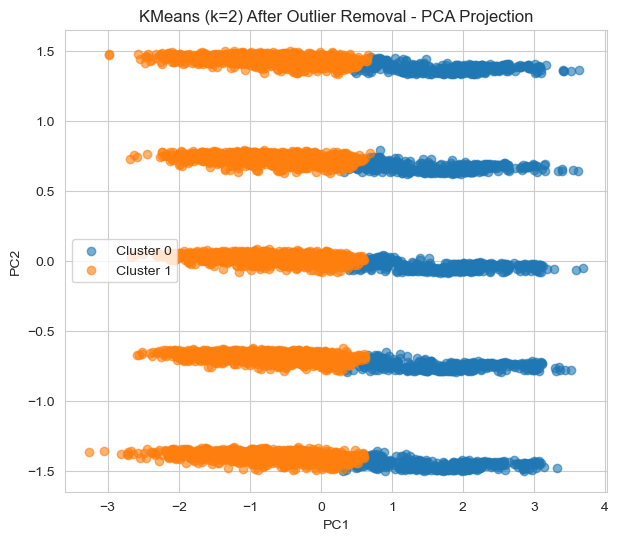

In [110]:
pca_2d = PCA(n_components=2)
X_no_out_pca2 = pca_2d.fit_transform(X_no_out)

plt.figure(figsize=(7,6))

for label in np.unique(labels_no_out):
    plt.scatter(
        X_no_out_pca2[labels_no_out == label, 0],
        X_no_out_pca2[labels_no_out == label, 1],
        alpha=0.6,
        label=f"Cluster {label}"
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans (k=2) After Outlier Removal - PCA Projection")
plt.legend()
plt.show()

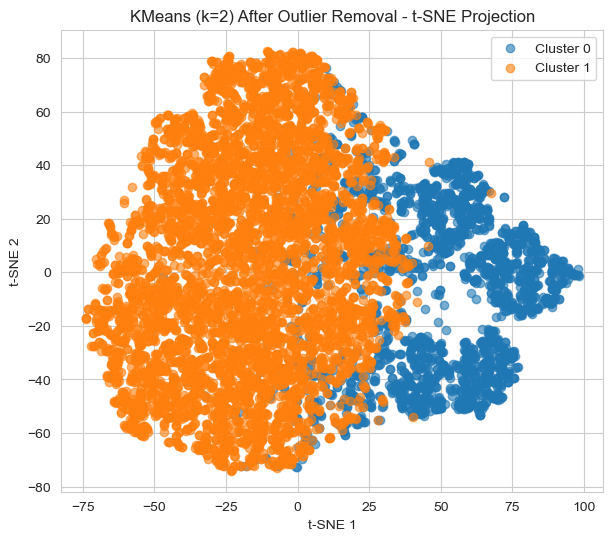

In [111]:

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_no_out_tsne = tsne.fit_transform(X_no_out)

plt.figure(figsize=(7,6))

for label in np.unique(labels_no_out):
    plt.scatter(
        X_no_out_tsne[labels_no_out == label, 0],
        X_no_out_tsne[labels_no_out == label, 1],
        alpha=0.6,
        label=f"Cluster {label}"
    )

plt.title("KMeans (k=2) After Outlier Removal - t-SNE Projection")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()

In [112]:
import umap
import matplotlib.pyplot as plt

umap_model = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)

X_umap_no_out = umap_model.fit_transform(X_no_out)

c:\Anaconda3\envs\unsupervised-learning\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


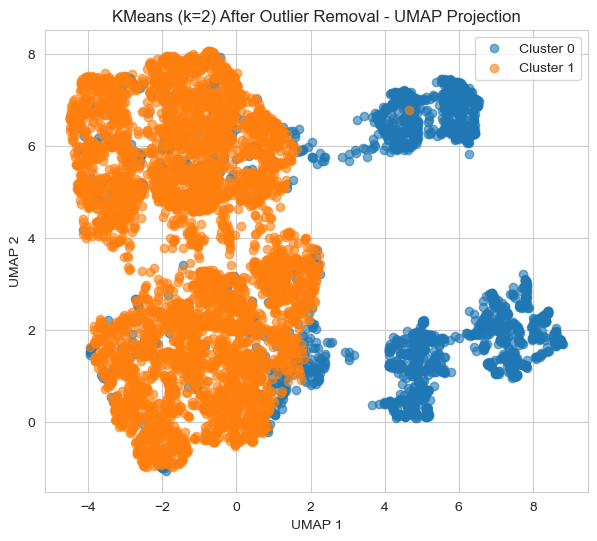

In [113]:
plt.figure(figsize=(7,6))

for label in np.unique(labels_no_out):
    plt.scatter(
        X_umap_no_out[labels_no_out == label, 0],
        X_umap_no_out[labels_no_out == label, 1],
        alpha=0.6,
        label=f"Cluster {label}"
    )

plt.title("KMeans (k=2) After Outlier Removal - UMAP Projection")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend()
plt.show()

<p>After removing outliers using the IQR method, the silhouette score increased from 0.1786 to 0.2072. This indicates that extreme values were negatively impacting cluster separation</p>

<p>Cluster separation became more pronounced in both PCA and t-SNE projections as well.</p>

<p>UMAP visualization reveals a clear nonlinear separation between two macro clusters after outlier removal.</p>

<h2>4.2 Hierarchical</h2>

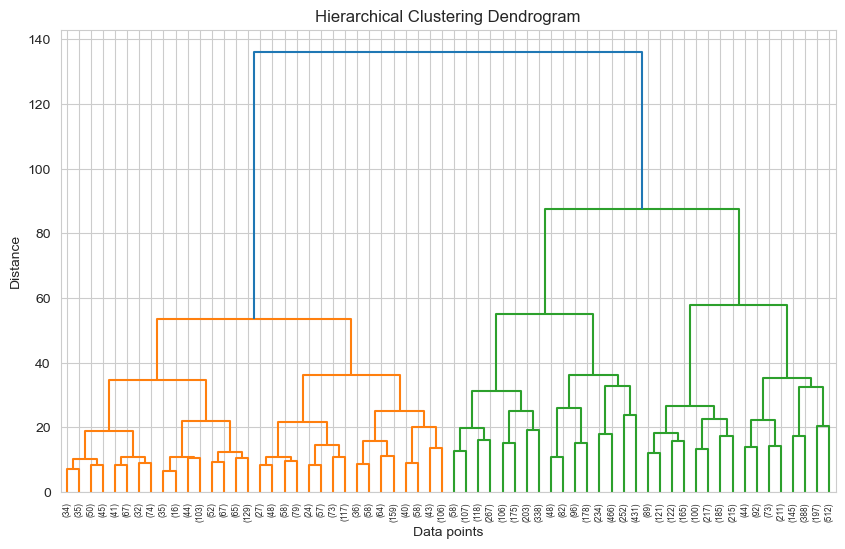

In [114]:
linked_no_out = linkage(X_no_out, method='ward')

plt.figure(figsize=(10,6))
dendrogram(linked_no_out, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

In [115]:
agg_no_out = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_agg_no_out = agg_no_out.fit_predict(X_no_out)

print("Agglomerative (no outliers)")
print("Silhouette:", silhouette_score(X_no_out, labels_agg_no_out))
print("Davies-Bouldin:", davies_bouldin_score(X_no_out, labels_agg_no_out))
print("Calinski-Harabasz:", calinski_harabasz_score(X_no_out, labels_agg_no_out))

Agglomerative (no outliers)
Silhouette: 0.19877381346267373
Davies-Bouldin: 1.7450491378806725
Calinski-Harabasz: 1791.6238493256953


<p>After removing outliers, hierarchical clustering showed improved compactness and separation (higher silhouette and lower Davies–Bouldin index), while still indicating that the dominant natural structure consists of two main clusters.</p>

<h2>4.3 DBSCAN</h2>

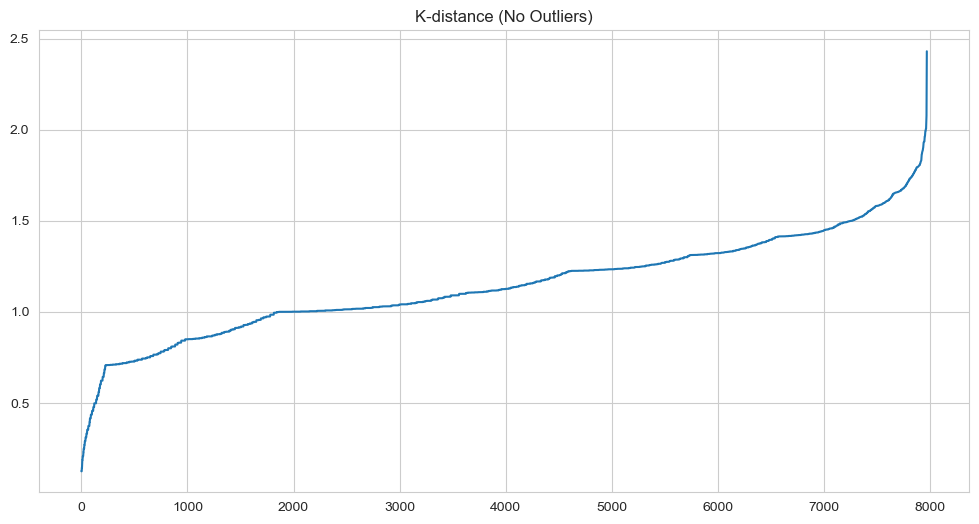

In [116]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_no_out)
distances, indices = neighbors_fit.kneighbors(X_no_out)

distances = np.sort(distances[:,4])

plt.plot(distances)
plt.title("K-distance (No Outliers)")
plt.show()

In [117]:
for eps in [1.1, 1.2, 1.3]:
    dbscan_no_out = DBSCAN(eps=eps, min_samples=5)
    labels_no_out = dbscan_no_out.fit_predict(X_no_out)

    n_clusters = len(set(labels_no_out)) - (1 if -1 in labels_no_out else 0)
    n_noise = list(labels_no_out).count(-1)

    print(f"\neps={eps}")
    print("Clusters:", n_clusters)
    print("Noise points:", n_noise)
    print("Noise %:", n_noise / len(labels_no_out))


eps=1.1
Clusters: 39
Noise points: 2652
Noise %: 0.33270605946556264

eps=1.2
Clusters: 26
Noise points: 1925
Noise %: 0.24150043909170743

eps=1.3
Clusters: 7
Noise points: 1067
Noise %: 0.13386024338226069


<p>Even after outlier removal, DBSCAN failed to identify stable density-separated clusters, as the number of clusters remained highly sensitive to epsilon and a significant portion of points was classified as noise.</p>

<h1>5 Dimensionality Reduction</h1>

In [124]:
kmeans_no_out = KMeans(n_clusters=2, n_init=10)
labels_no_out = kmeans_no_out.fit_predict(X_no_out)

pca = PCA(n_components=7)
X_pca_reduced = pca.fit_transform(X_no_out)

kmeans_no_out_pca = KMeans(n_clusters=2, n_init=10)
labels_no_out_pca = kmeans_no_out_pca.fit_predict(X_pca_reduced)

umap_reducer = umap.UMAP(
    n_components=5,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)

X_no_out_umap = umap_reducer.fit_transform(X_no_out)

kmeans_no_out_umap = KMeans(n_clusters=2, n_init=10)
labels_no_out_umap = kmeans_no_out_umap.fit_predict(X_no_out_umap)

print("Silhouette (Original, no outliers):",
      silhouette_score(X_no_out, labels_no_out))

print("Silhouette (PCA -> KMeans):",
      silhouette_score(X_pca_reduced, labels_no_out_pca))

print("Silhouette (UMAP -> KMeans):",
      silhouette_score(X_no_out_umap, labels_no_out_umap))

c:\Anaconda3\envs\unsupervised-learning\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Silhouette (Original, no outliers): 0.20725492378216157
Silhouette (PCA -> KMeans): 0.2481208901120049
Silhouette (UMAP -> KMeans): 0.6006152033805847


<p>Dimensionality reduction before clustering improves separability. PCA moderately increases silhouette score, suggesting that cluster structure lies within dominant linear components. UMAP significantly increases silhouette score, indicating the presence of nonlinear manifold structure that becomes more clearly separable in embedded space.</p>